In [2]:
import numpy as np
import pandas as pd
from pycaret.regression import *
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv('heart_2022_with_nans.csv')

In [57]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [58]:
df.shape

(445132, 40)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [60]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

<Axes: >

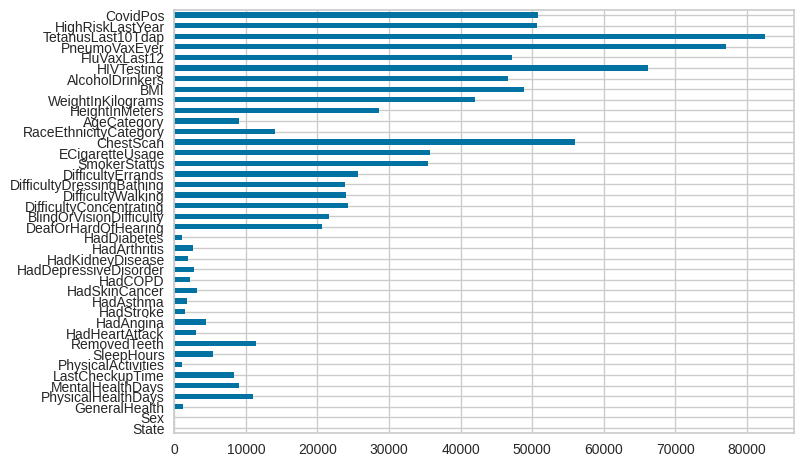

In [61]:
df.isnull().sum().plot(kind='barh')

In [62]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

State
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
--------------------------------------------------
Sex
['Female' 'Male']
--------------------------------------------------
GeneralHealth
['Very good' 'Excellent' 'Fair' 'Poor' 'Good' nan]
--------------------------------------------------
PhysicalHealthDays
[ 0.  2.  1.  8.  5. 30.  4. 23. 14. nan 15.  3. 10.  7. 25.  6. 21. 20.
 29. 16.  9. 27. 2

In [63]:
df.dropna(inplace=True)

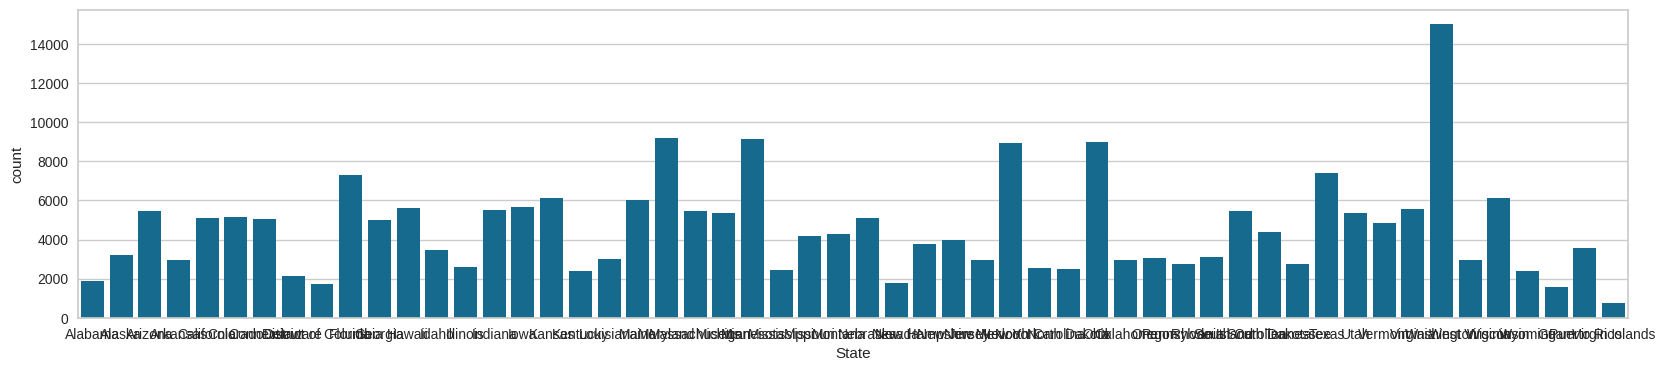

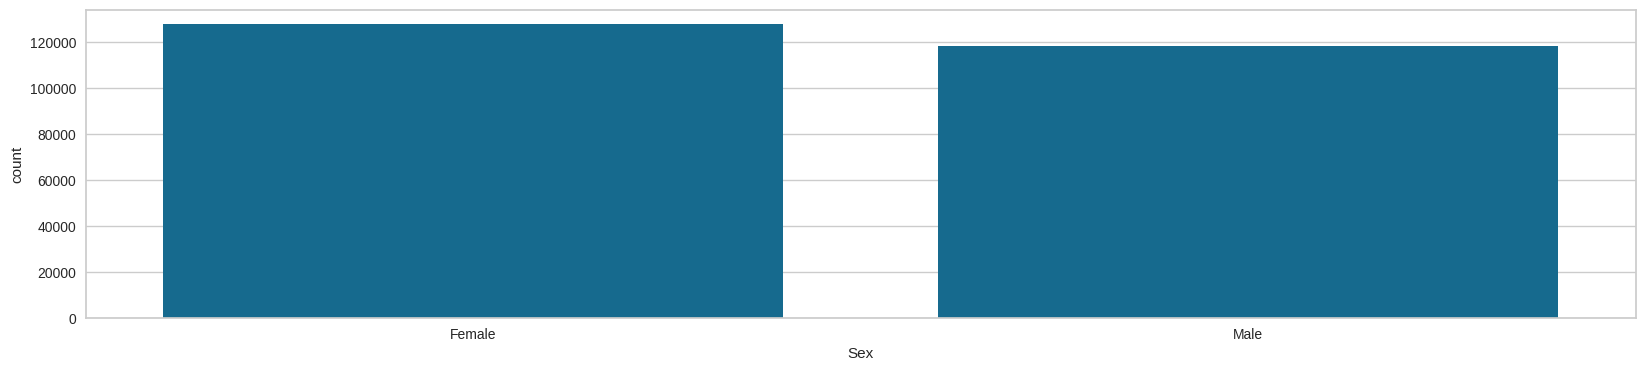

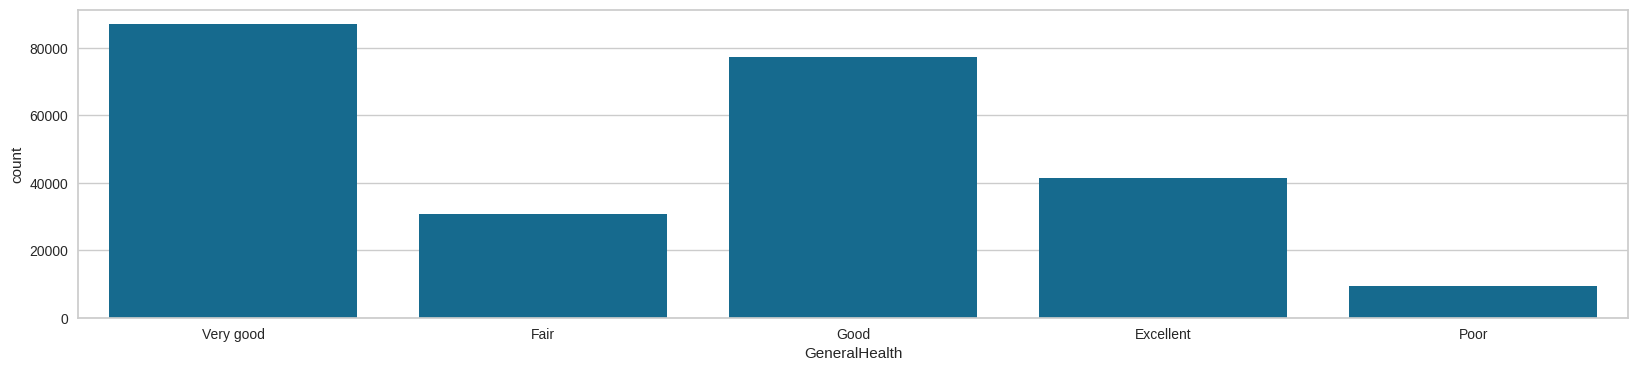

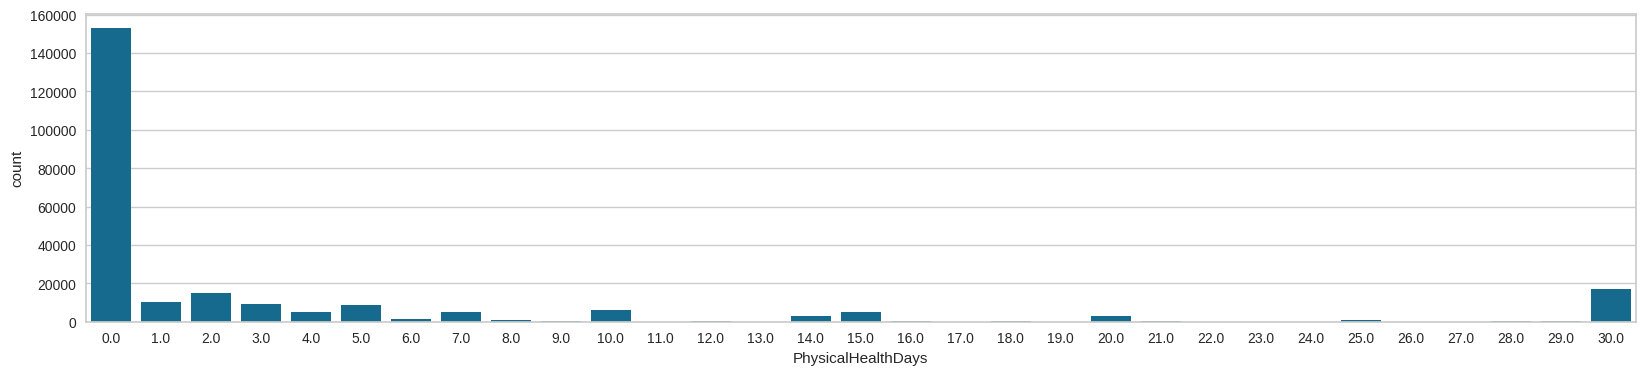

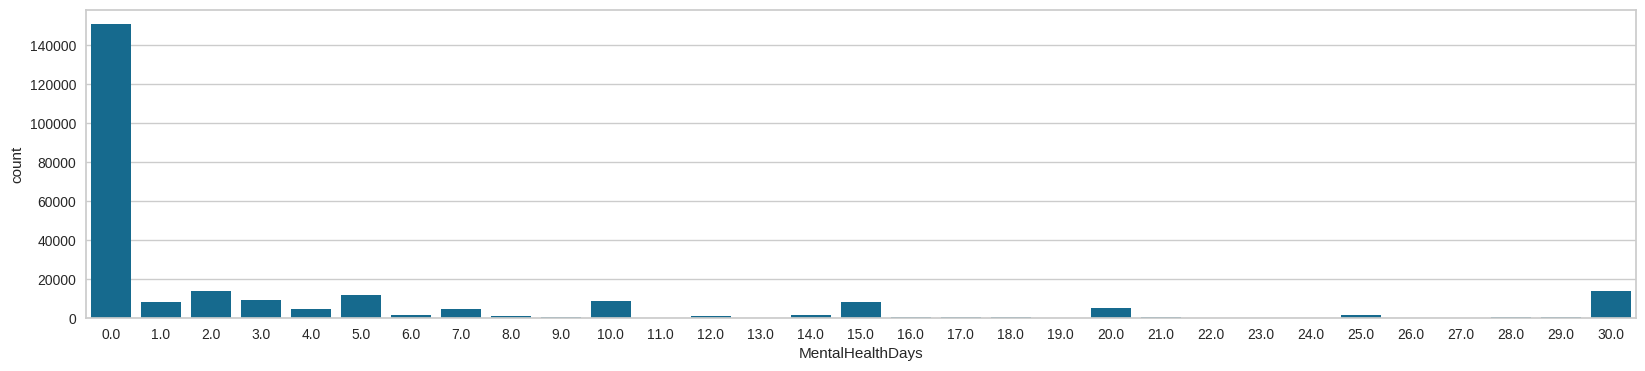

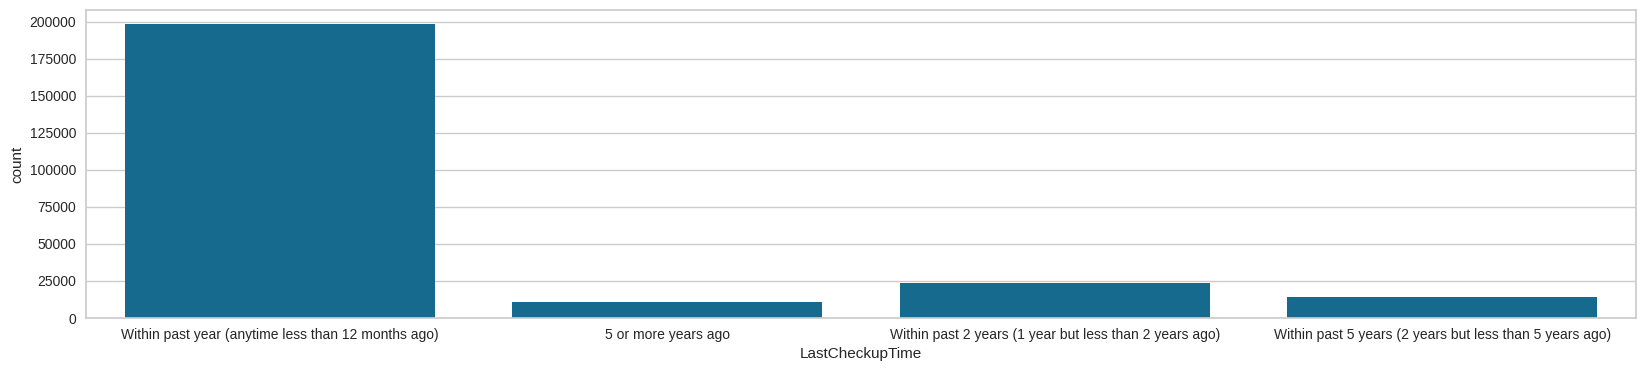

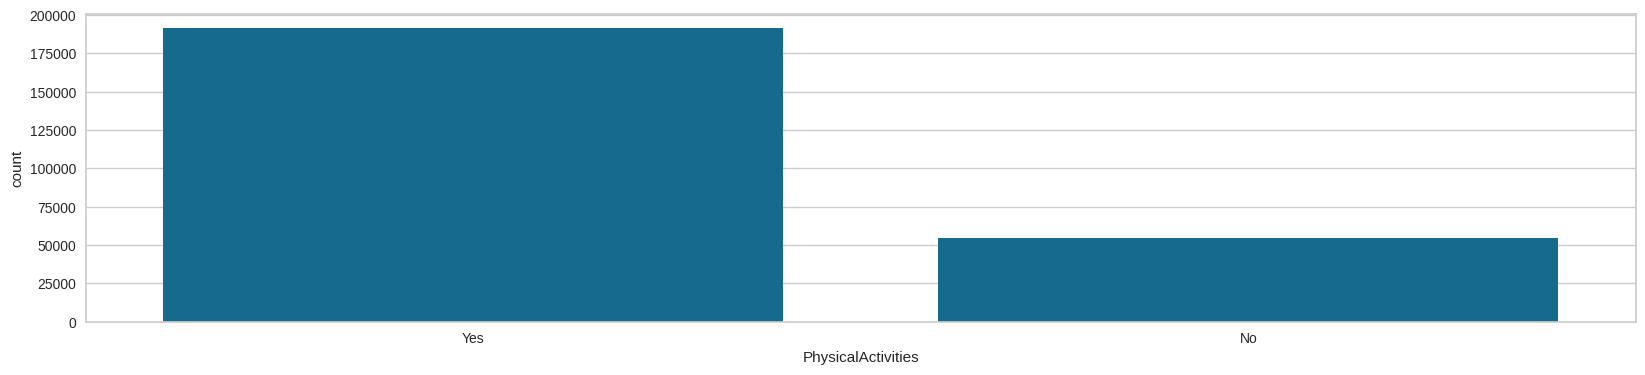

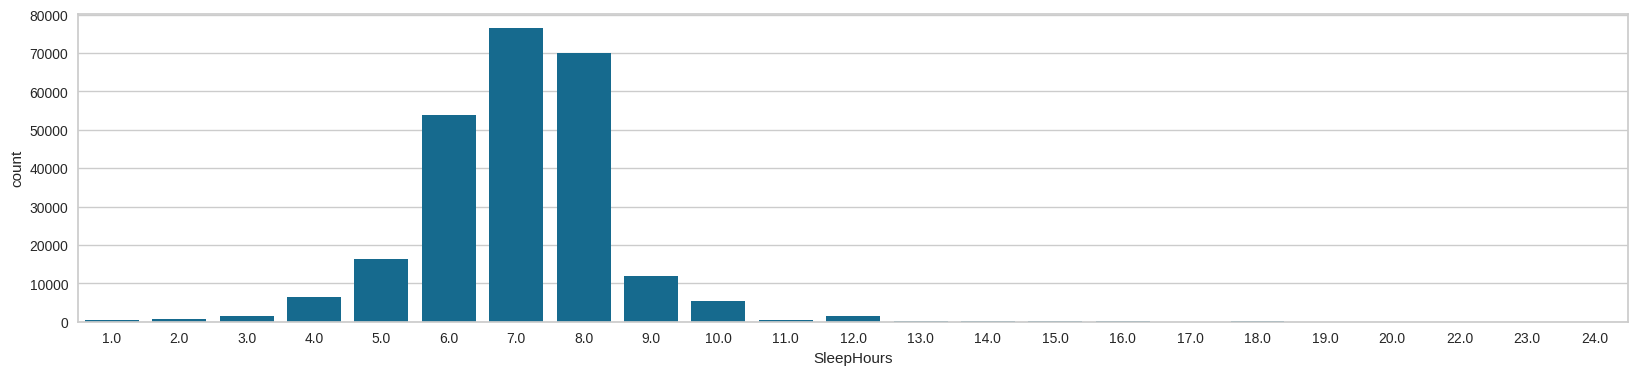

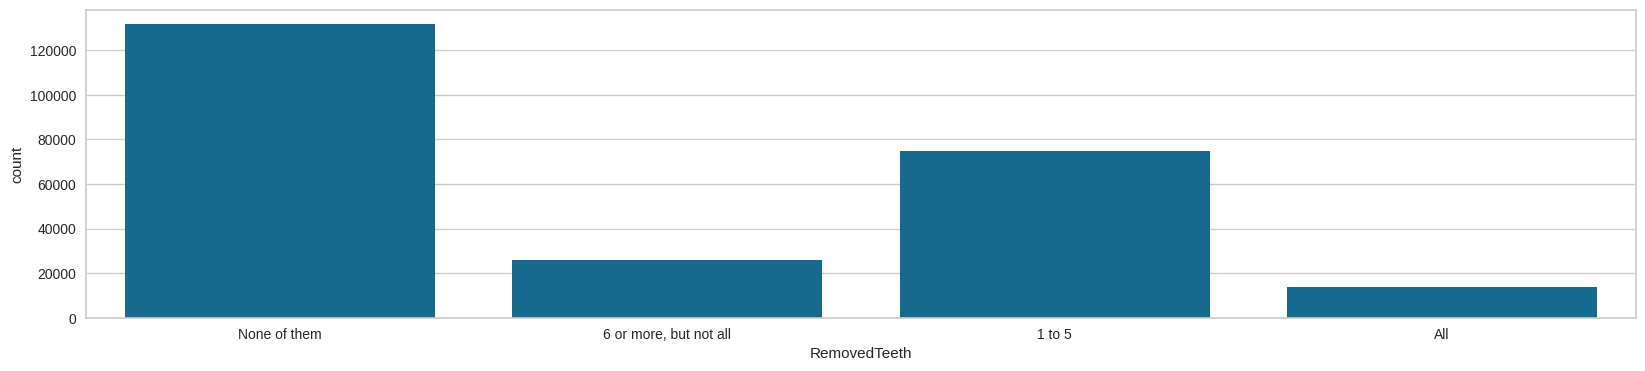

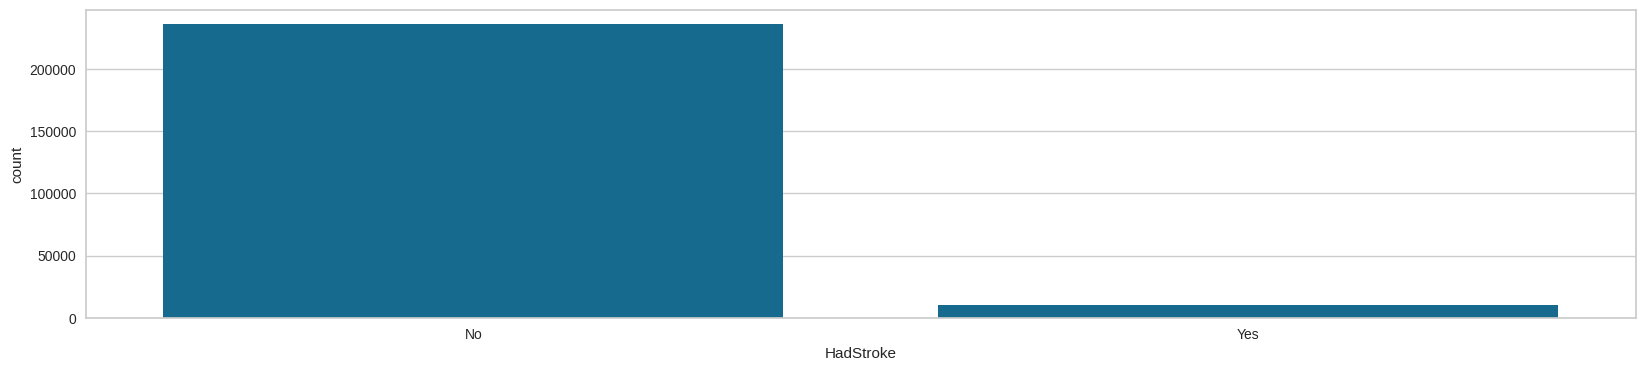

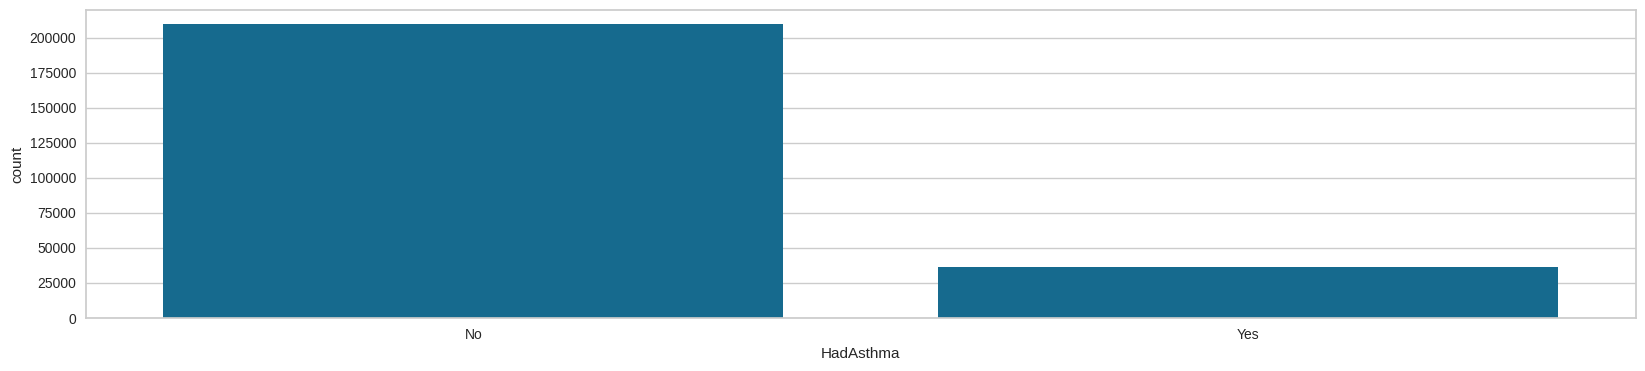

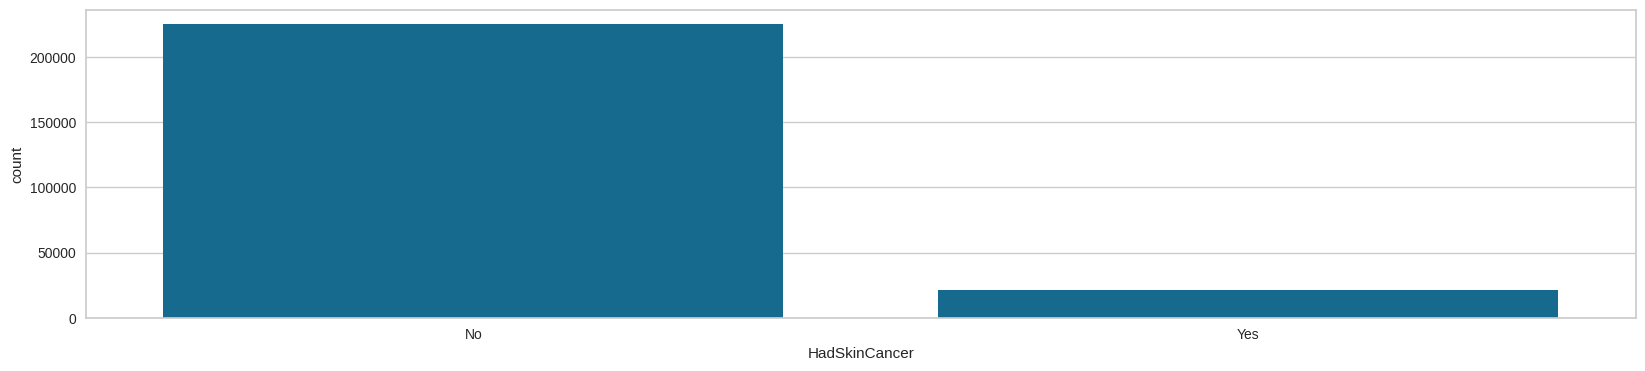

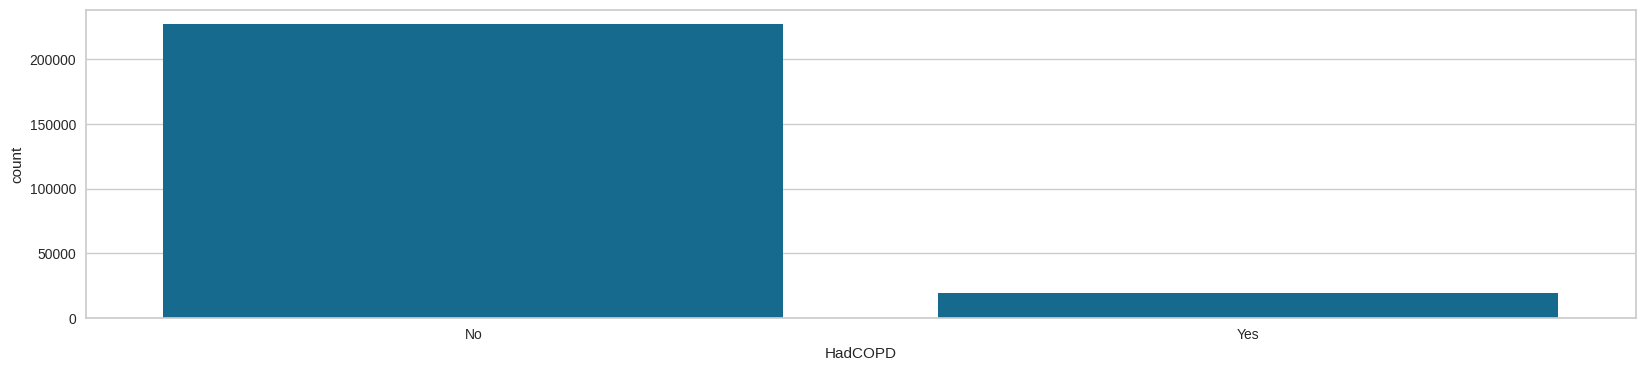

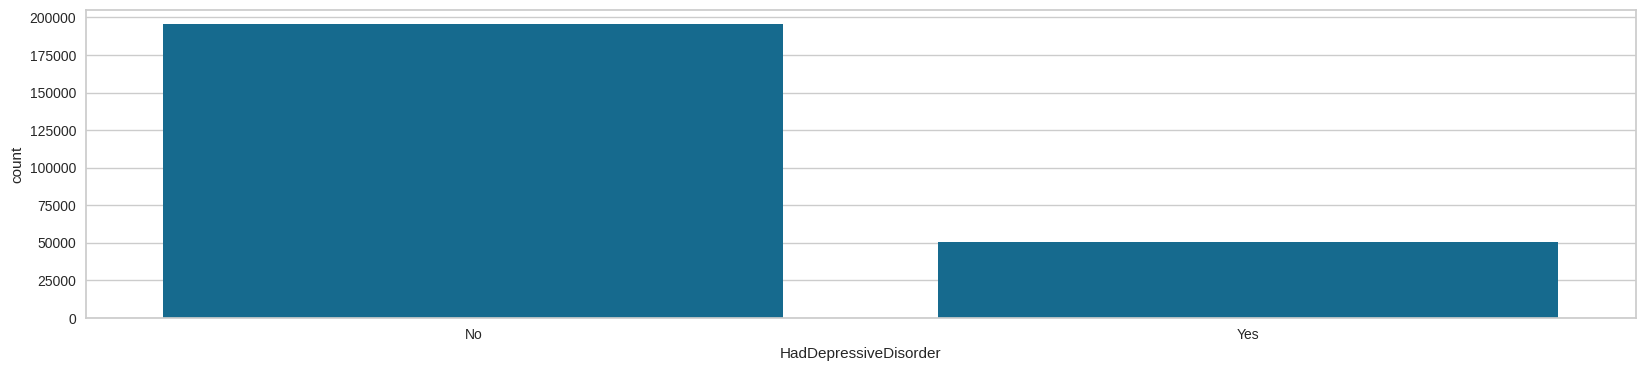

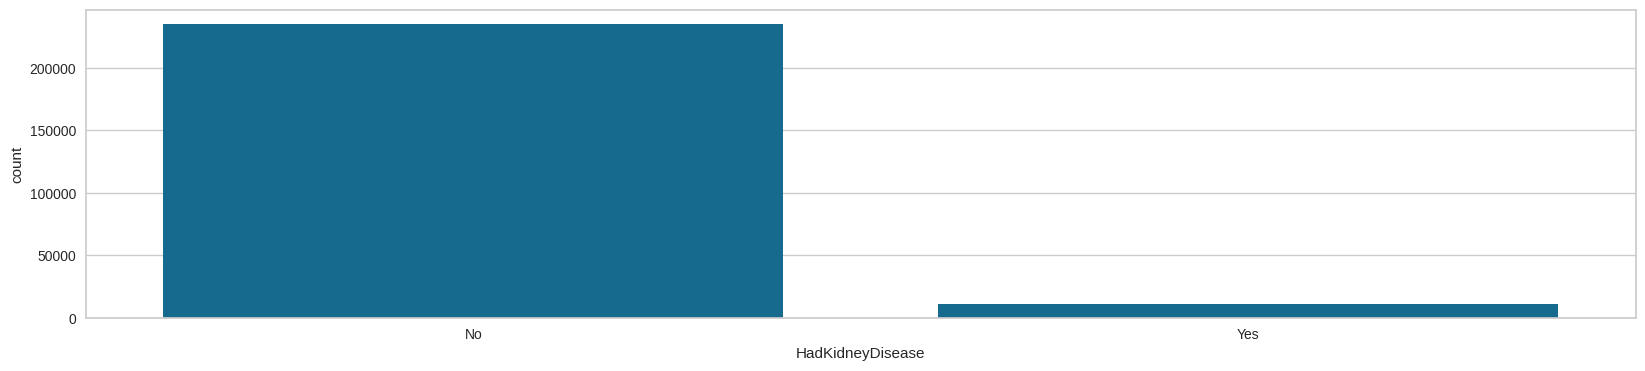

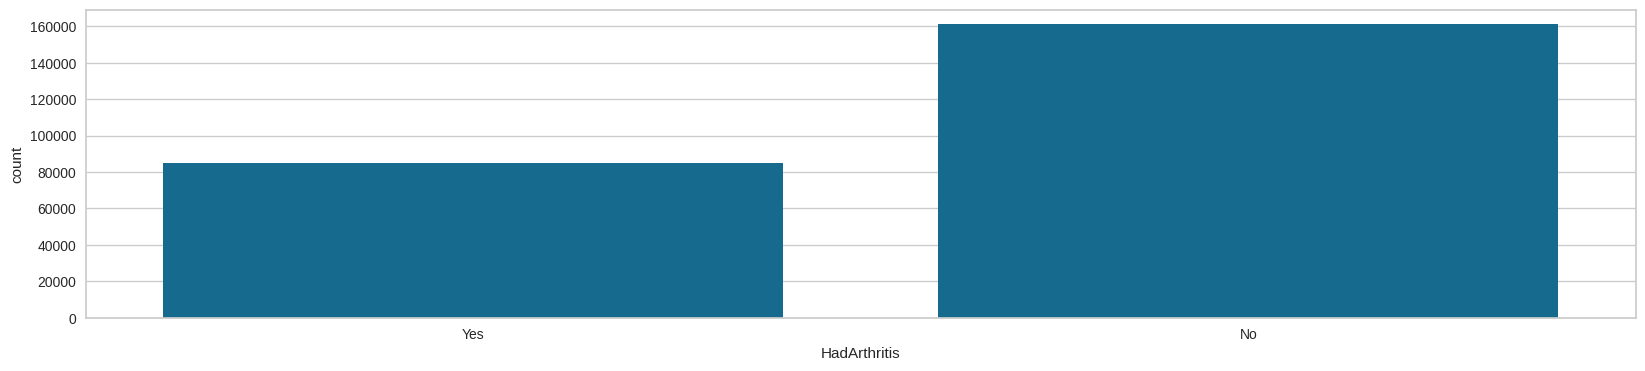

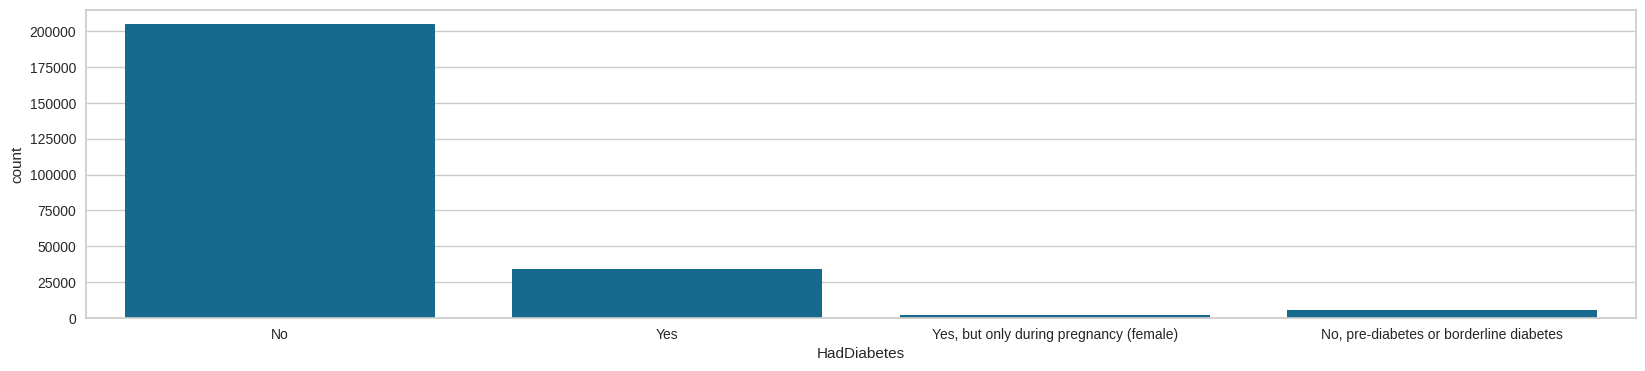

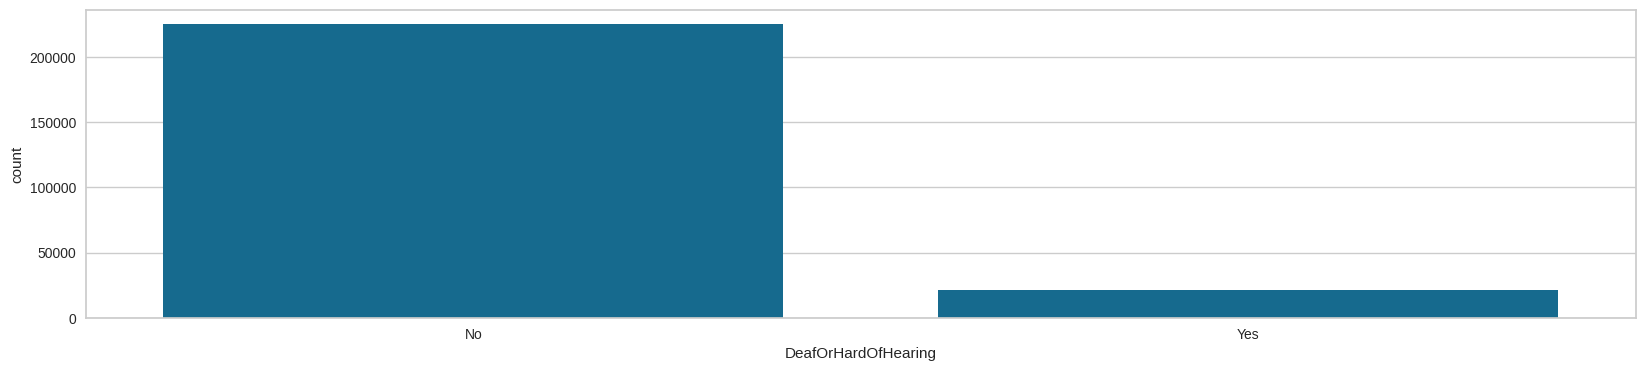

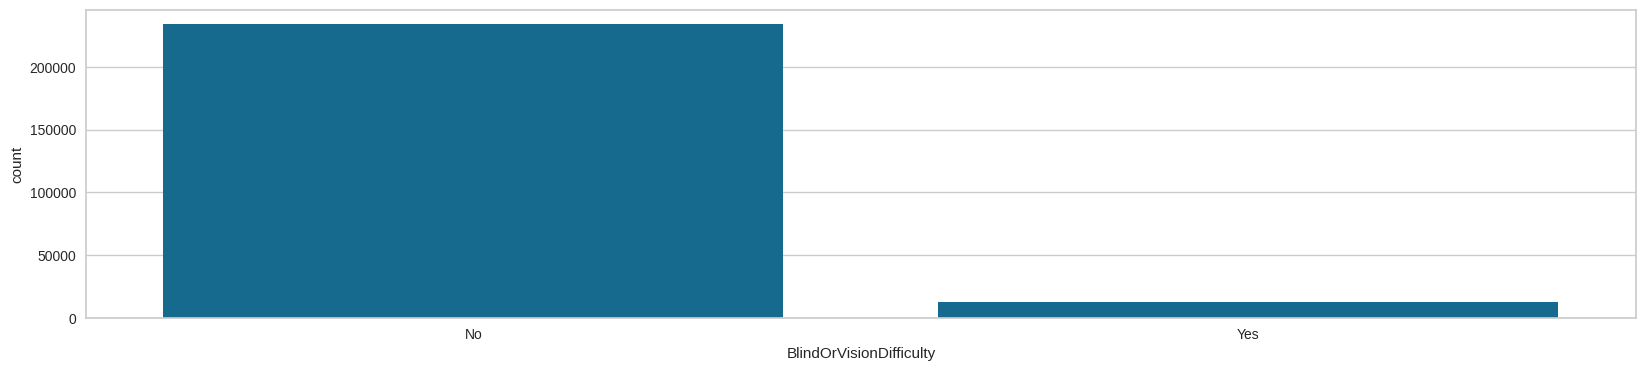

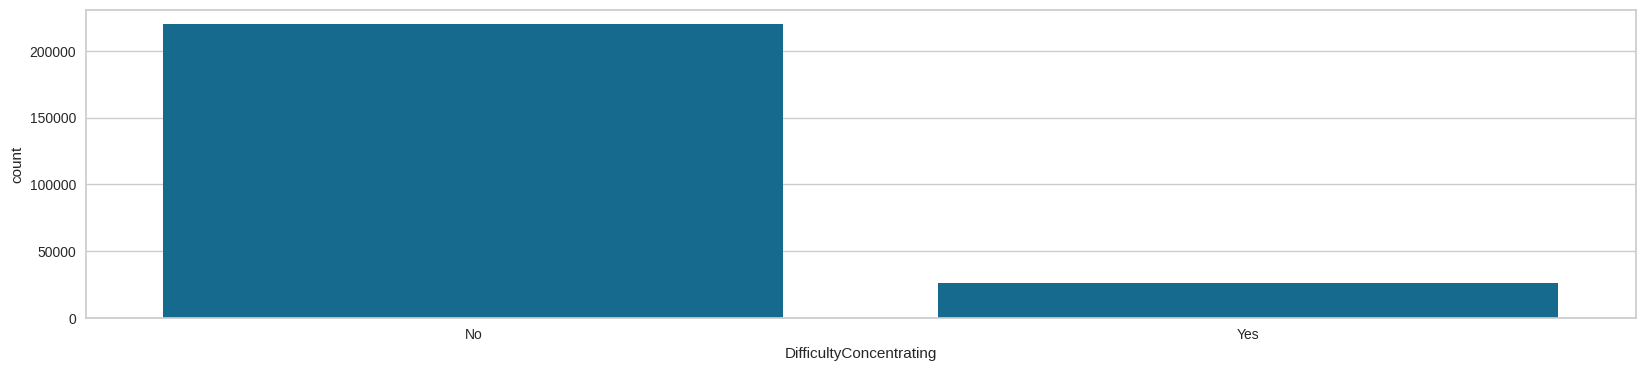

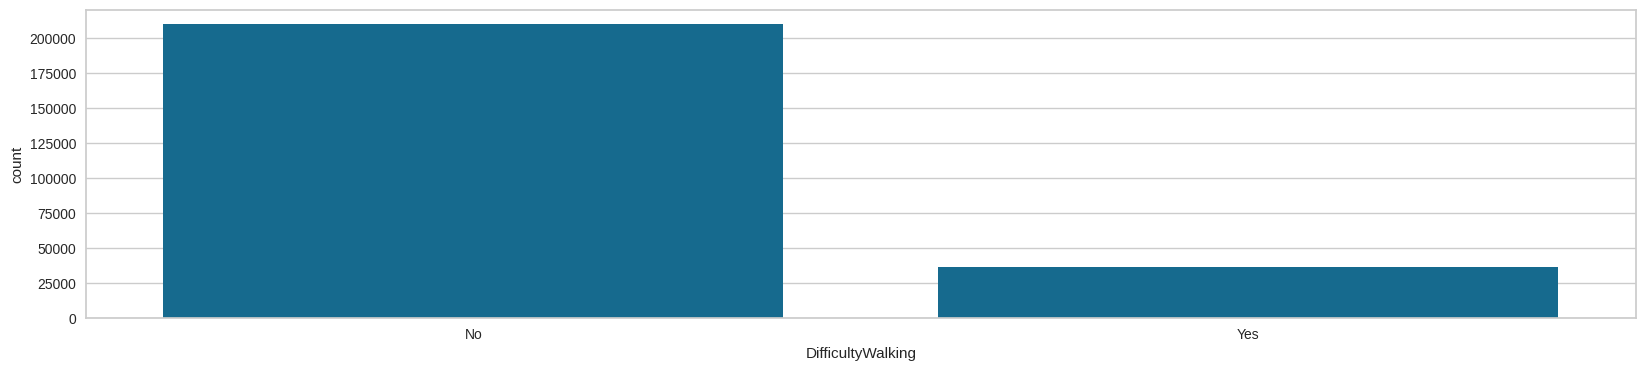

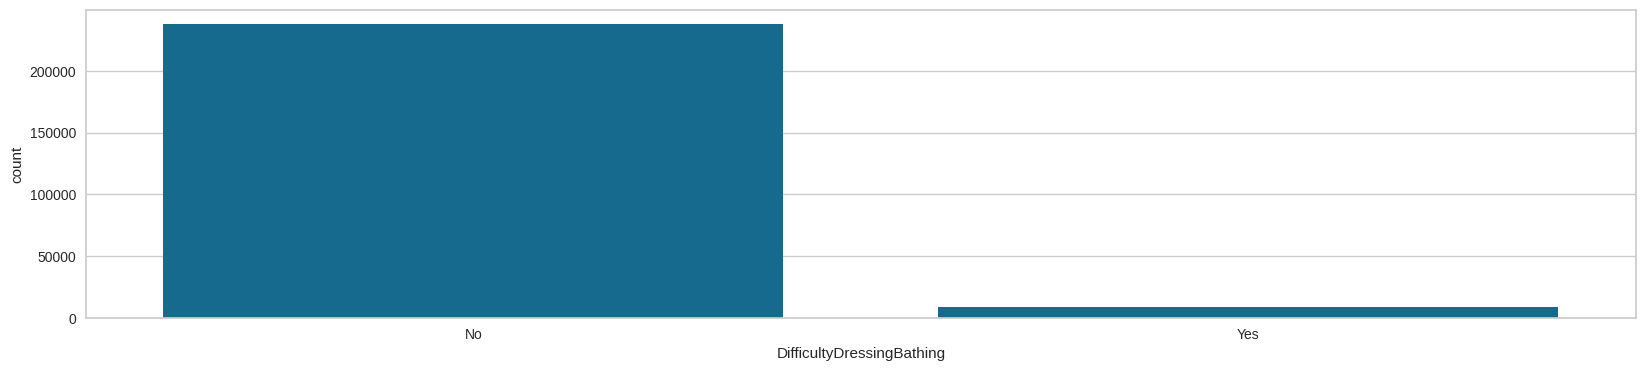

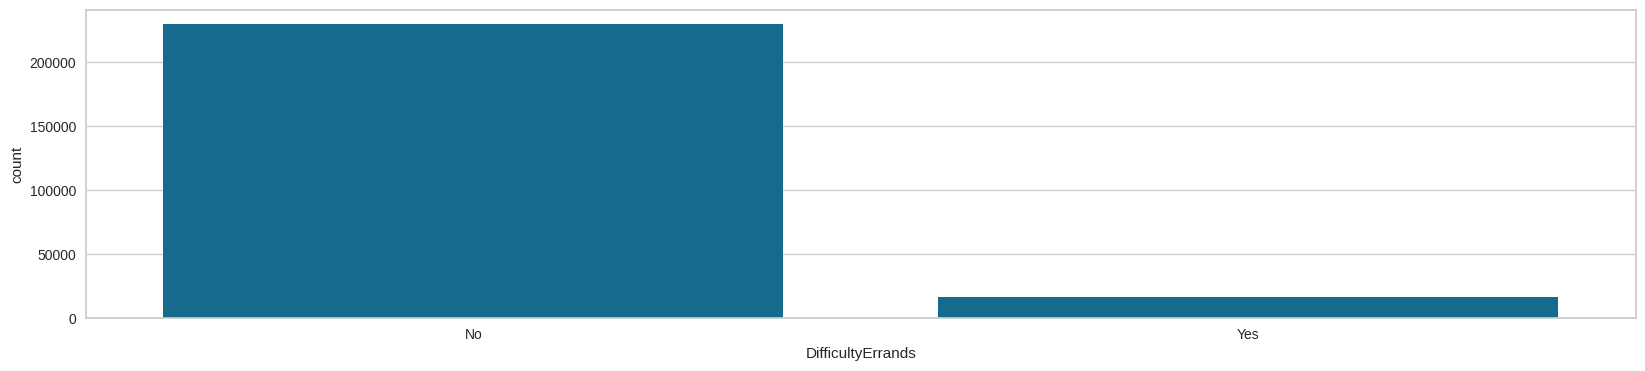

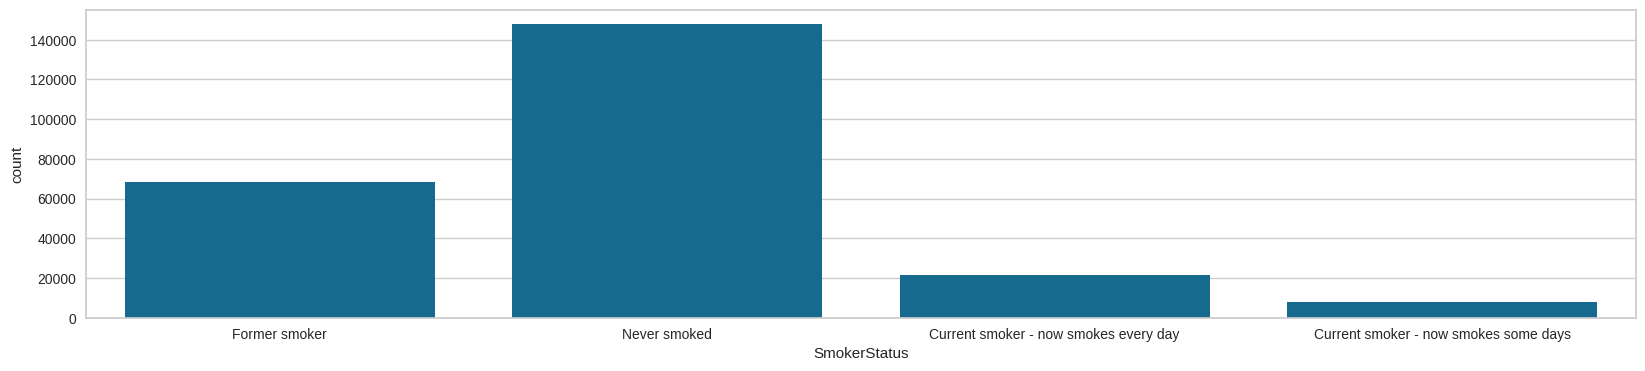

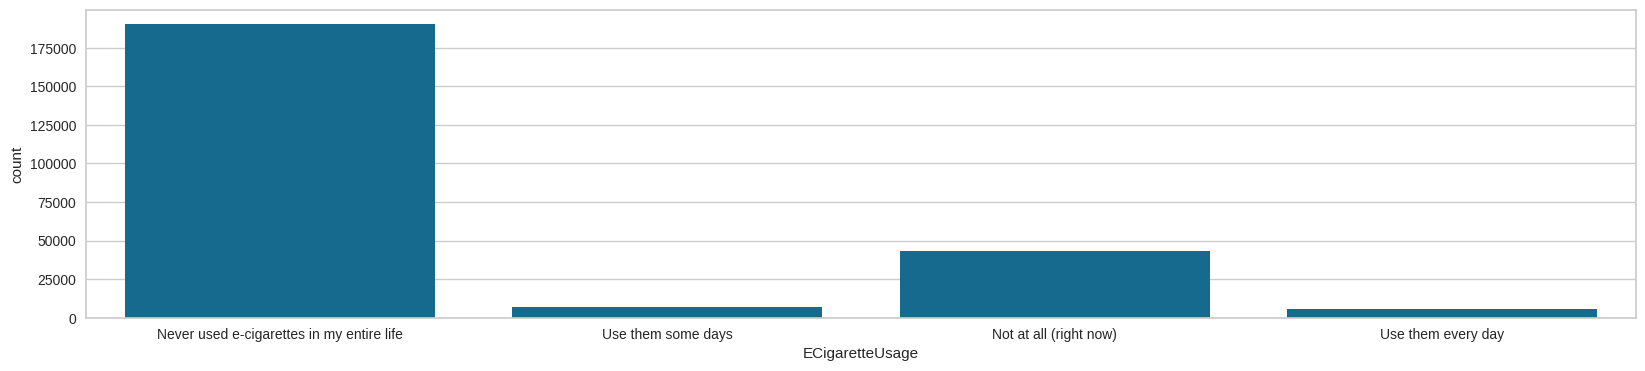

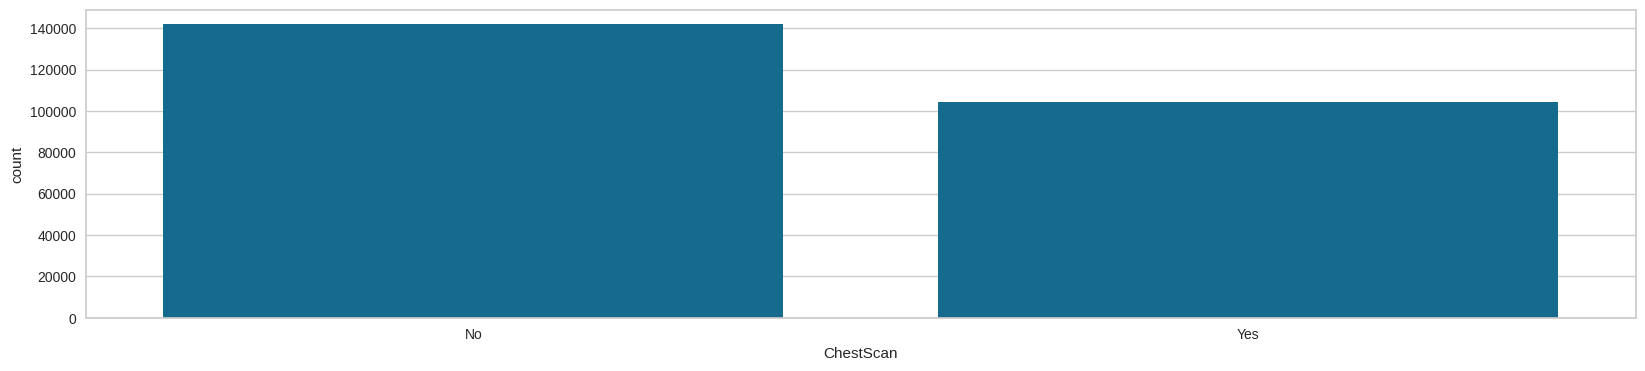

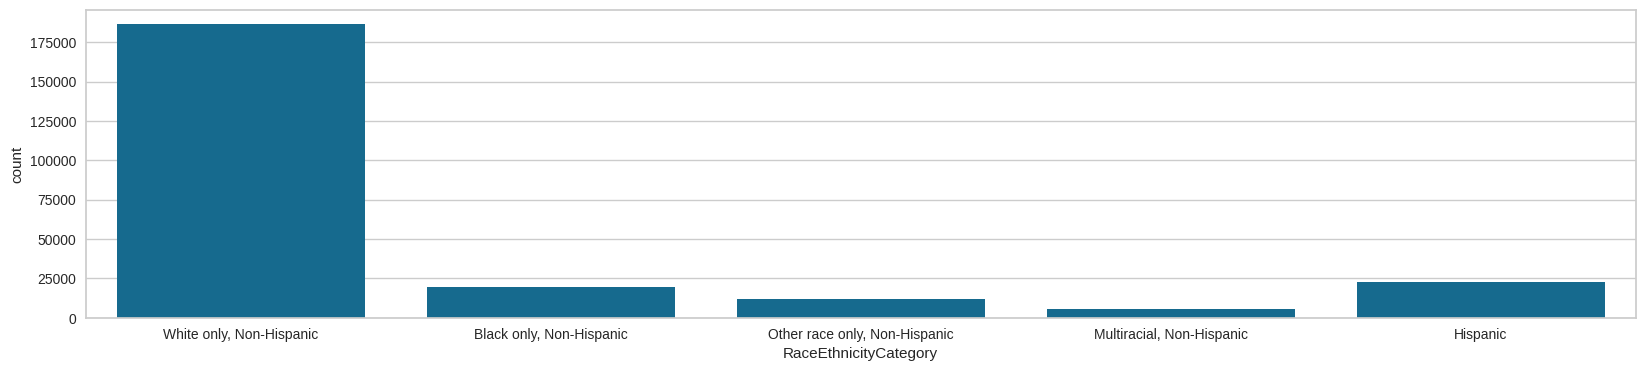

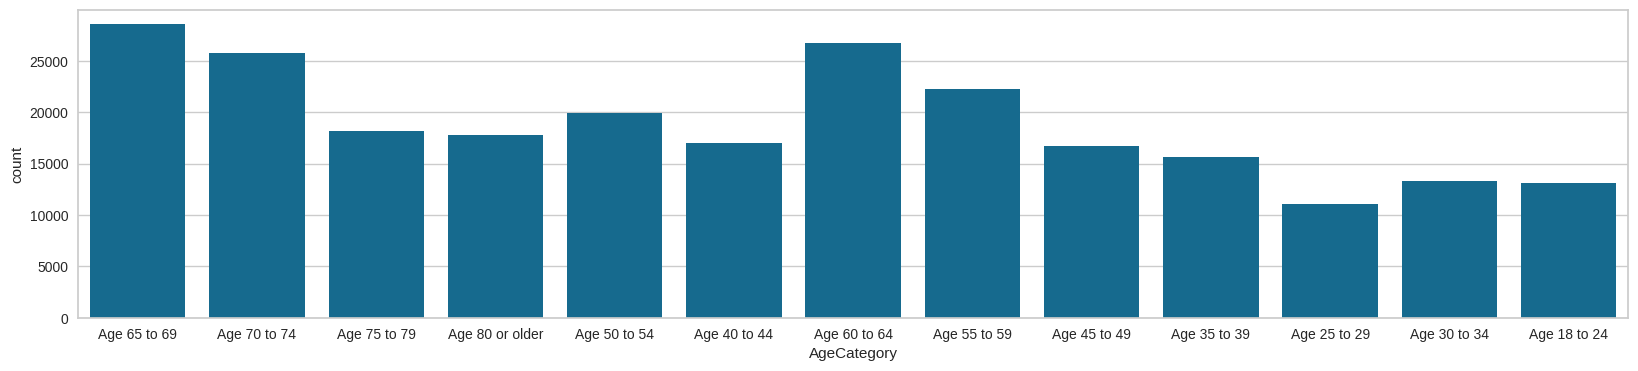

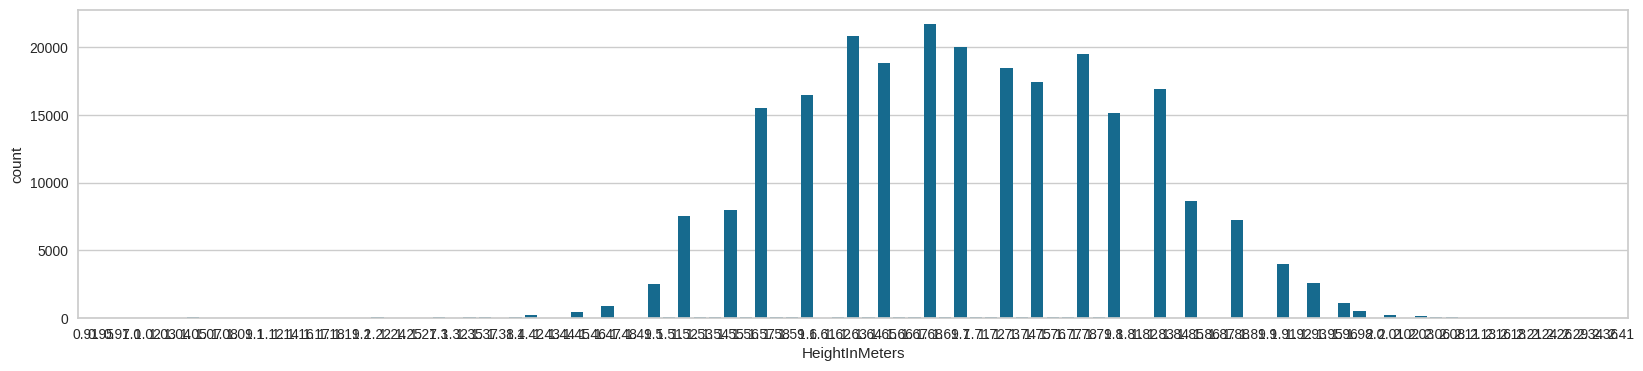

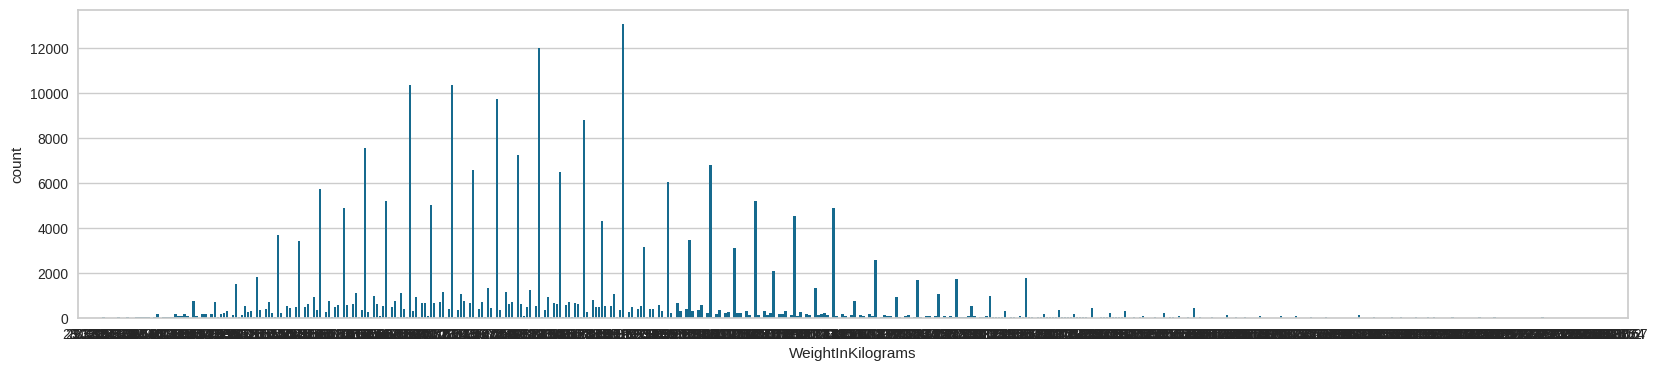

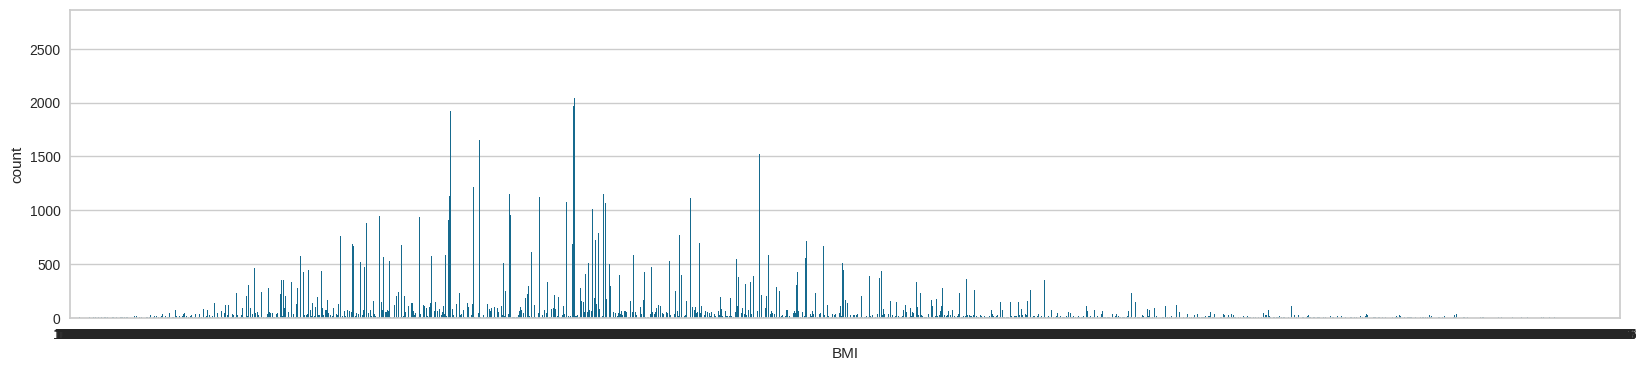

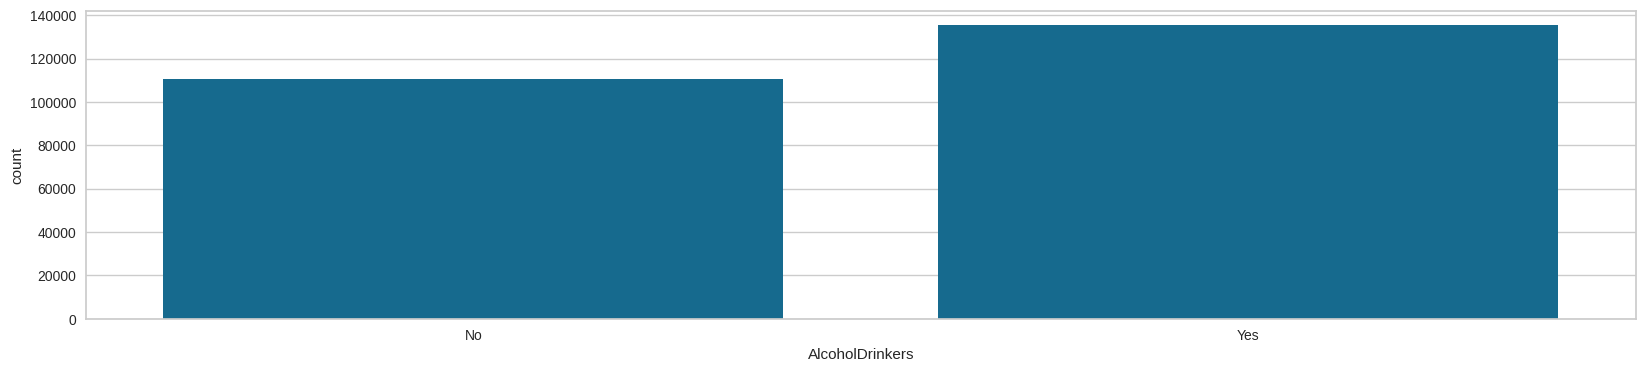

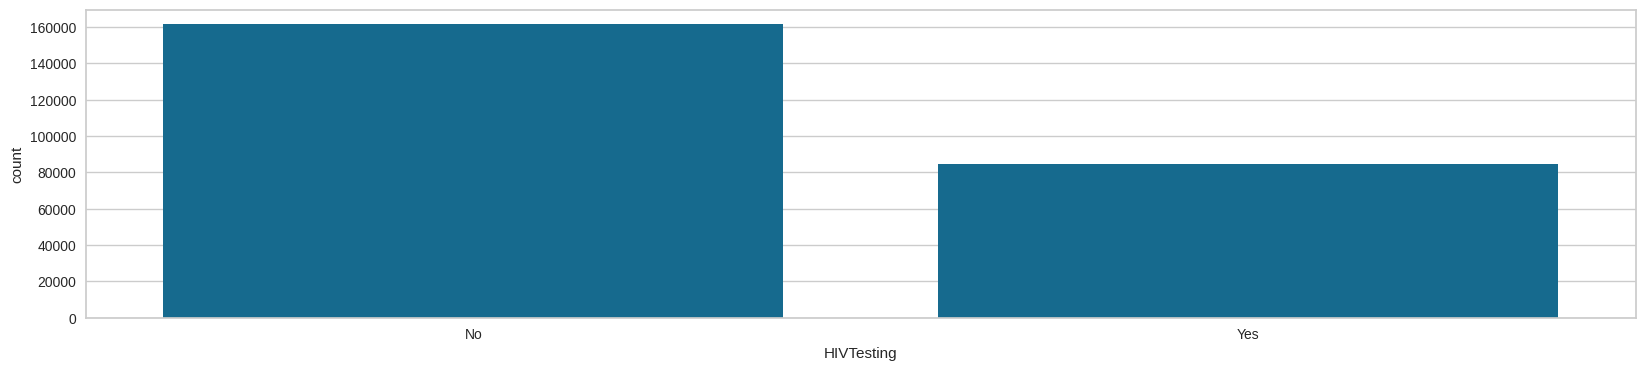

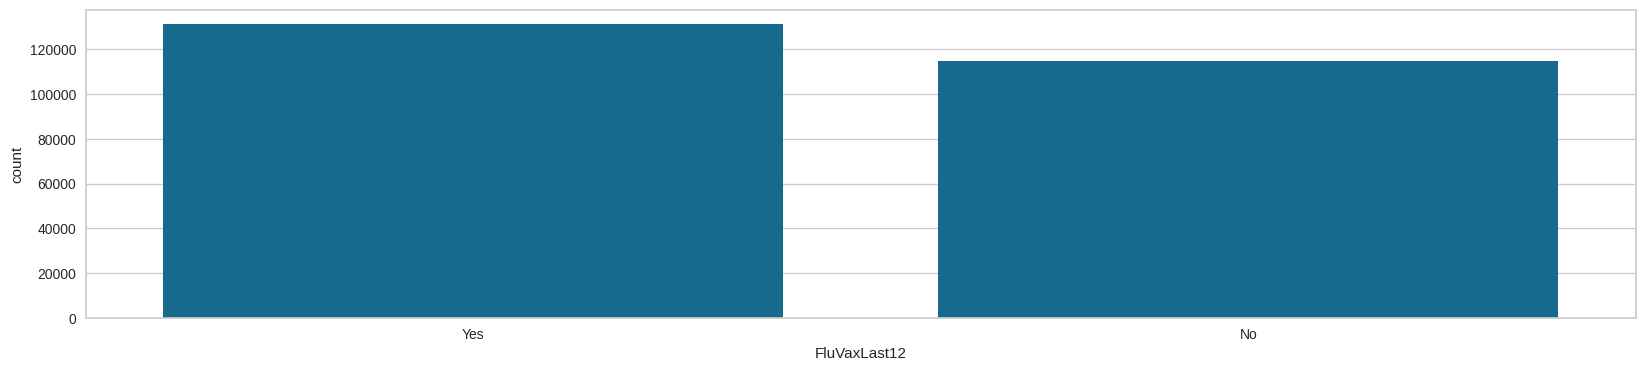

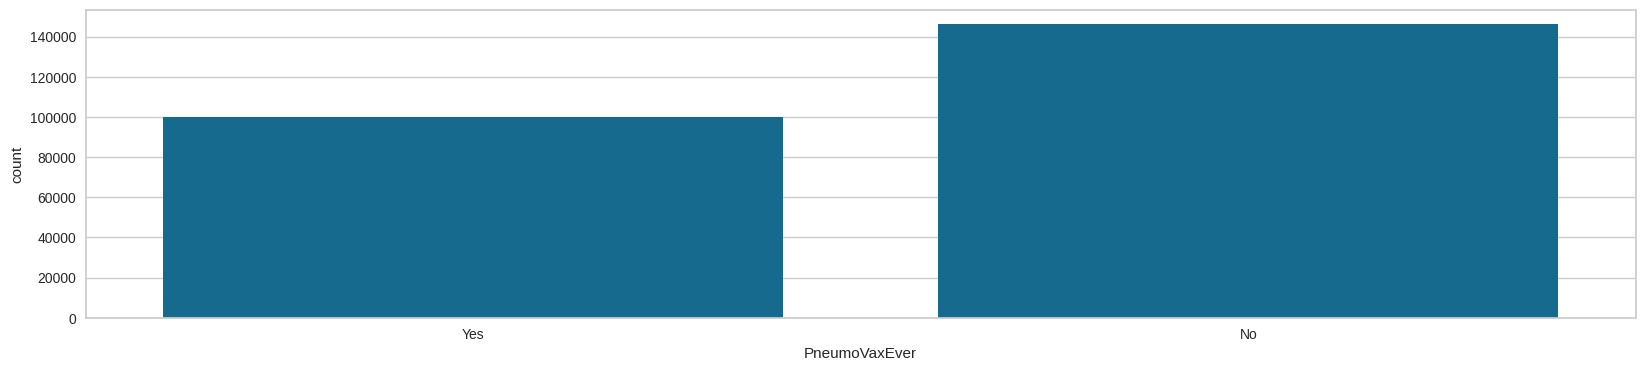

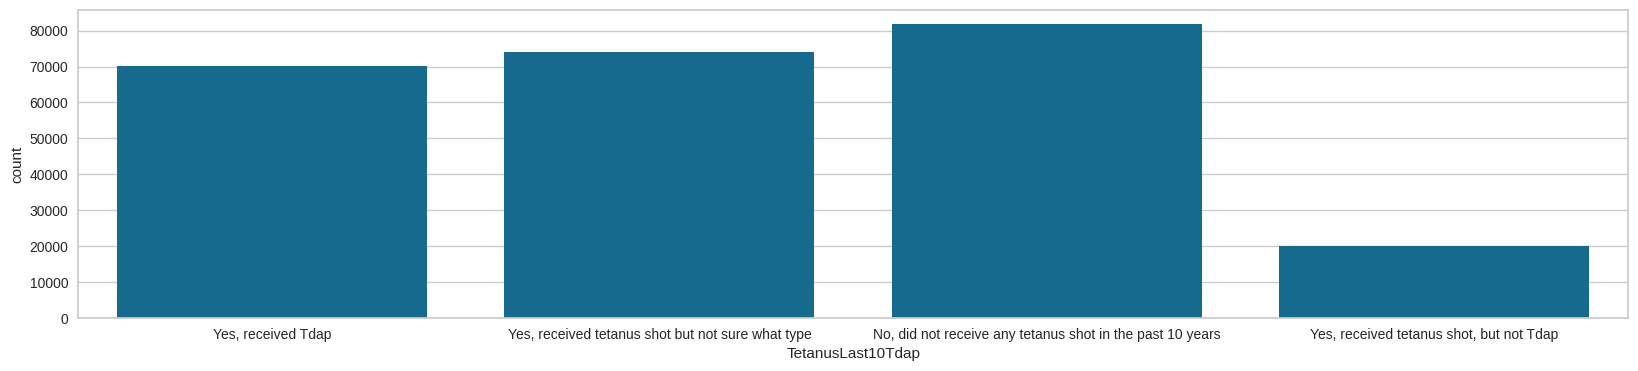

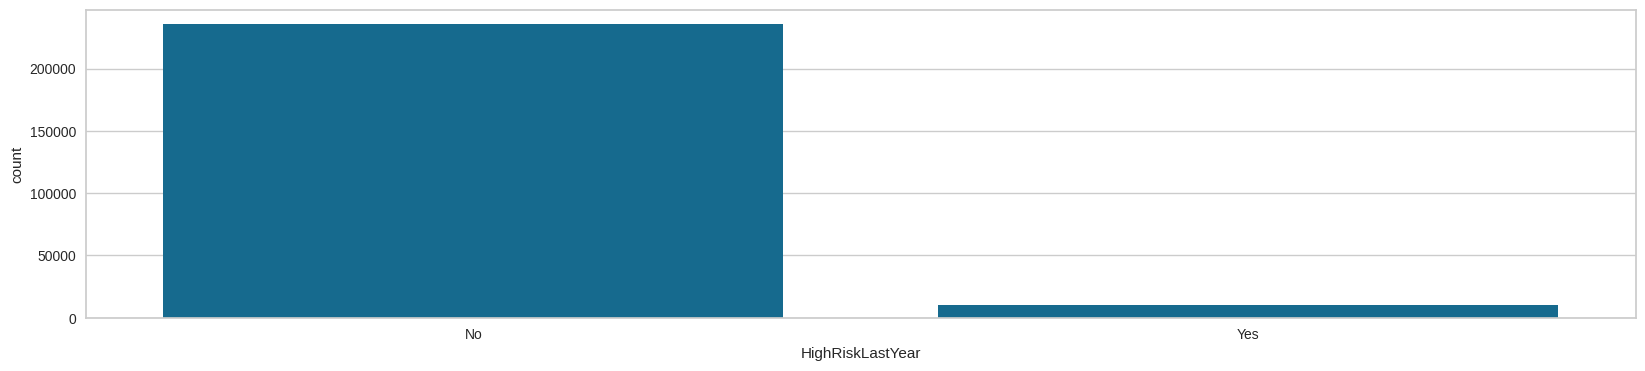

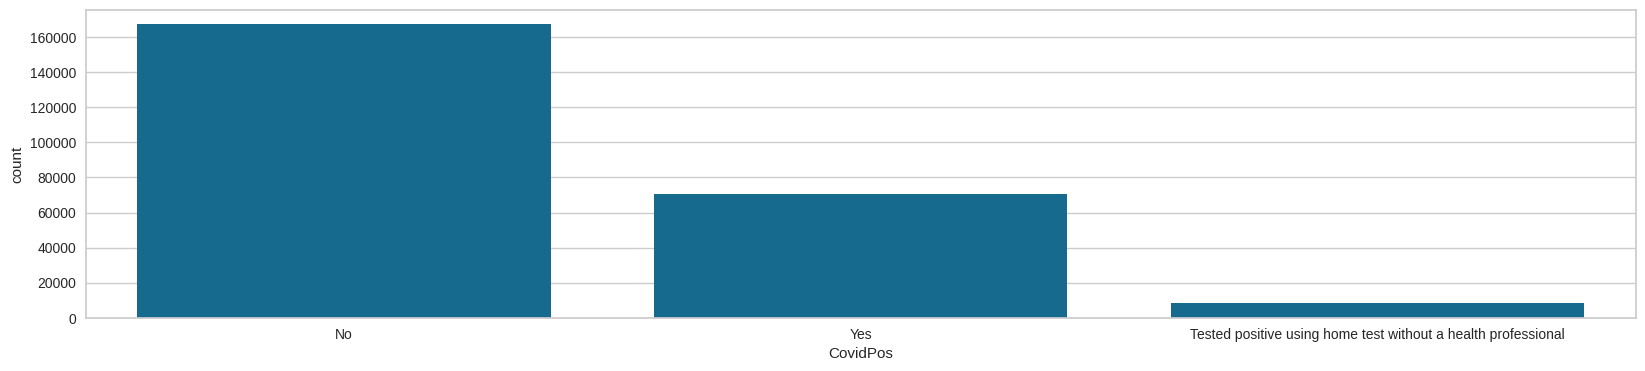

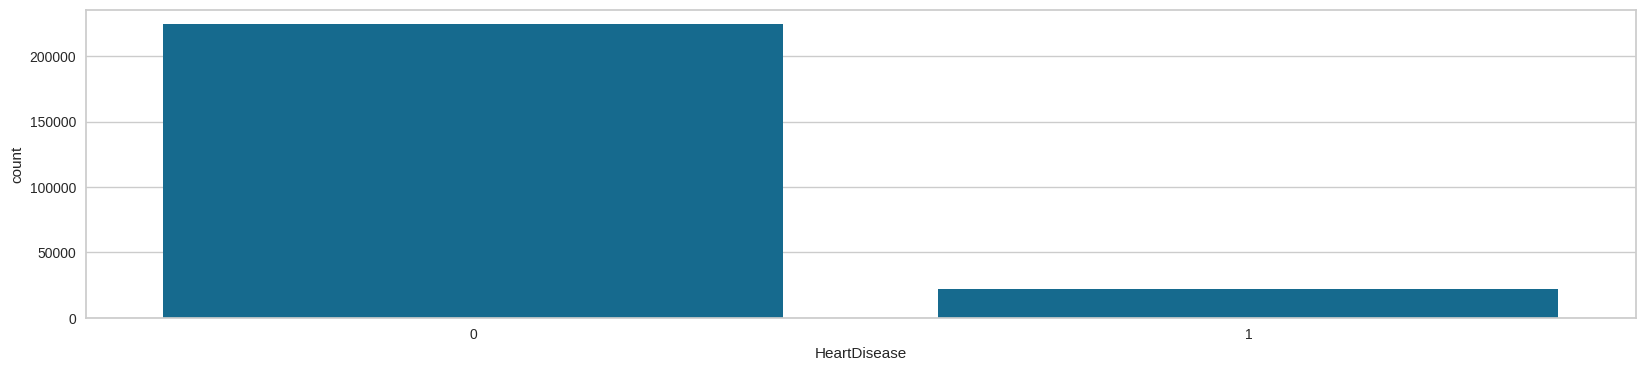

In [76]:
for col in df.columns:
    plt.figure(figsize=(20,4))
    sns.countplot(x=df[col])

<Axes: >

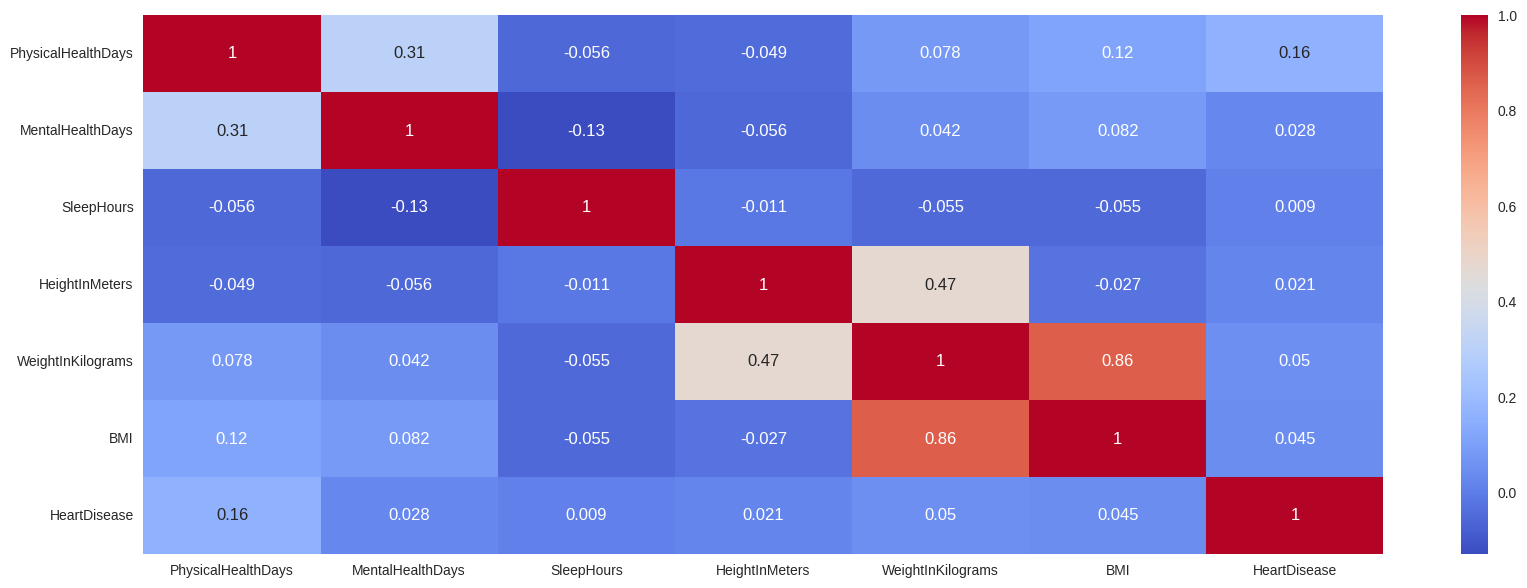

In [73]:
correlation=df.corr()
plt.figure(figsize=(20,7))
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [64]:
df['HadHeartAttack']=df['HadHeartAttack'].map({'Yes':1,'No':0})
df['HadAngina']=df['HadAngina'].map({'Yes':1,'No':0})
df['HeartDisease']=df['HadHeartAttack']|df['HadAngina']
df.drop(['HadHeartAttack','HadAngina'],axis=1,inplace=True)

In [70]:
category_cols=df.select_dtypes(include=[object])
numeric_cols=df.select_dtypes(include=[np.number])
numeric_cols

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartDisease
342,4.0,0.0,9.0,1.60,71.67,27.99,0
343,0.0,0.0,6.0,1.78,95.25,30.13,0
345,0.0,0.0,8.0,1.85,108.86,31.66,0
346,5.0,0.0,9.0,1.70,90.72,31.32,0
347,3.0,15.0,5.0,1.55,79.38,33.07,0
...,...,...,...,...,...,...,...
445117,0.0,0.0,6.0,1.78,102.06,32.28,0
445123,0.0,7.0,7.0,1.93,90.72,24.34,0
445124,0.0,15.0,7.0,1.68,83.91,29.86,0
445128,2.0,2.0,7.0,1.70,83.01,28.66,0


Text(0.5, 1.0, 'Heart Disease Distribution')

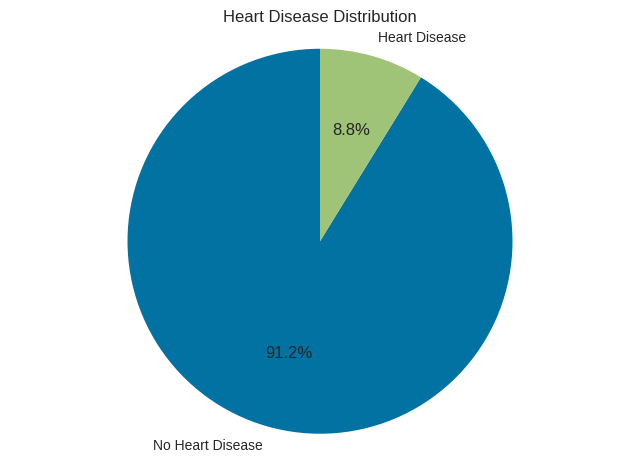

In [46]:
heart_disease_counts=df['HeartDisease'].value_counts()
fig,ax=plt.subplots()
ax.pie(heart_disease_counts,labels=['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle=90)
ax.axis('equal')
plt.title('Heart Disease Distribution')

In [110]:
ages = {
    'Age 80 or older': 80,
    'Age 55 to 59': 55,
    'Age 40 to 44': 40,
    'Age 75 to 79': 75,
    'Age 70 to 74': 70,
    'Age 65 to 69': 65,
    'Age 60 to 64': 60,
    'Age 50 to 54': 50,
    'Age 45 to 49': 45,
    'Age 35 to 39': 35,
    'Age 25 to 29': 25,
    'Age 30 to 34': 30,
    'Age 18 to 24': 18
}

df['AgeCategory'] = df['AgeCategory'].map(lambda x: ages[x])

In [111]:
numeric_cols=[]
category_cols=[]
for col in df.columns:
    if df[col].dtype=='object':
        category_cols.append(col)
    else:
        numeric_cols.append(col)

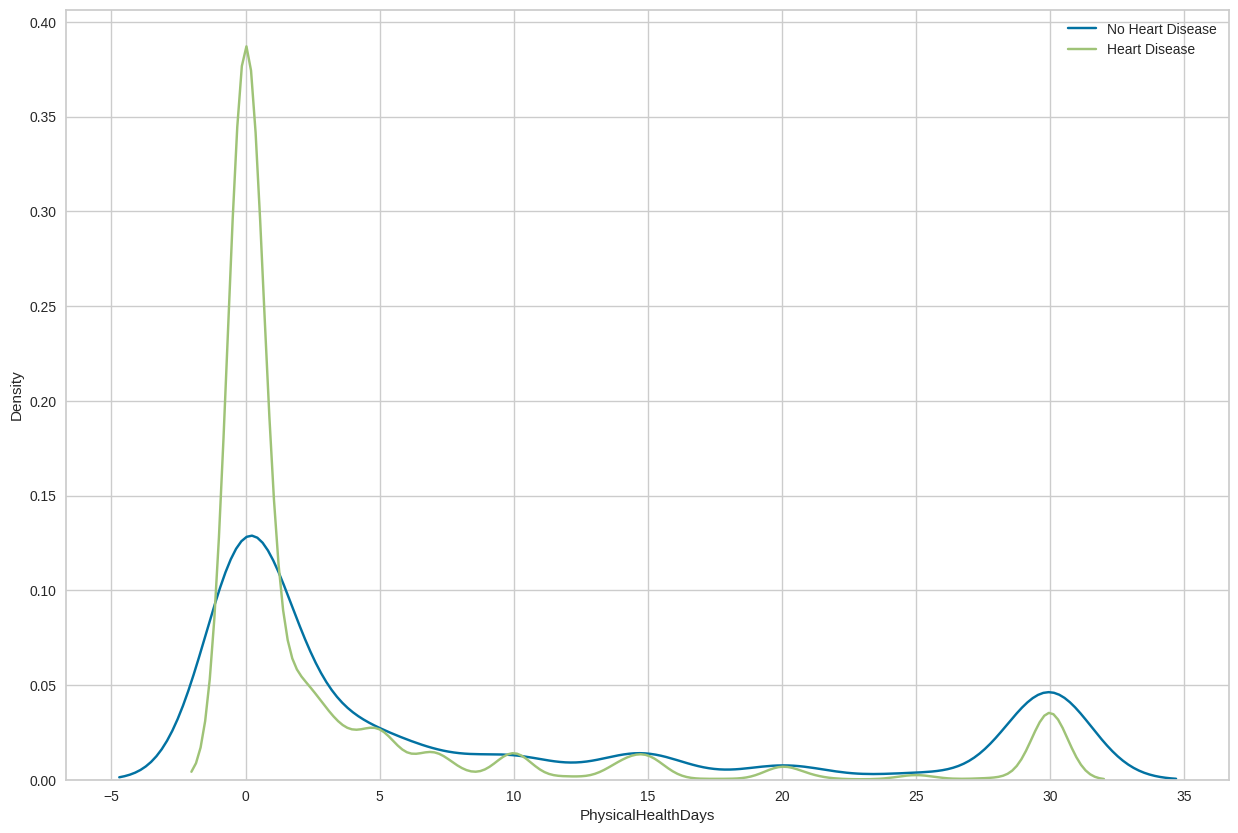

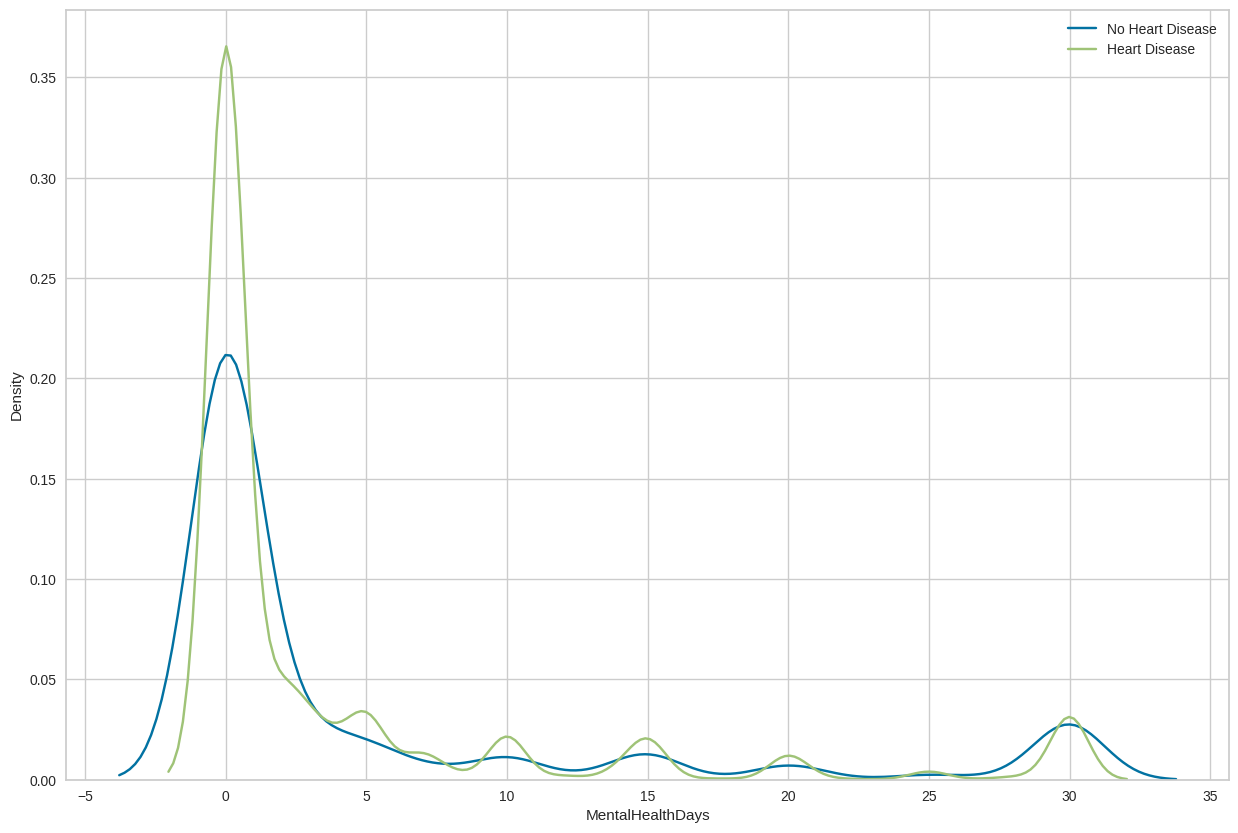

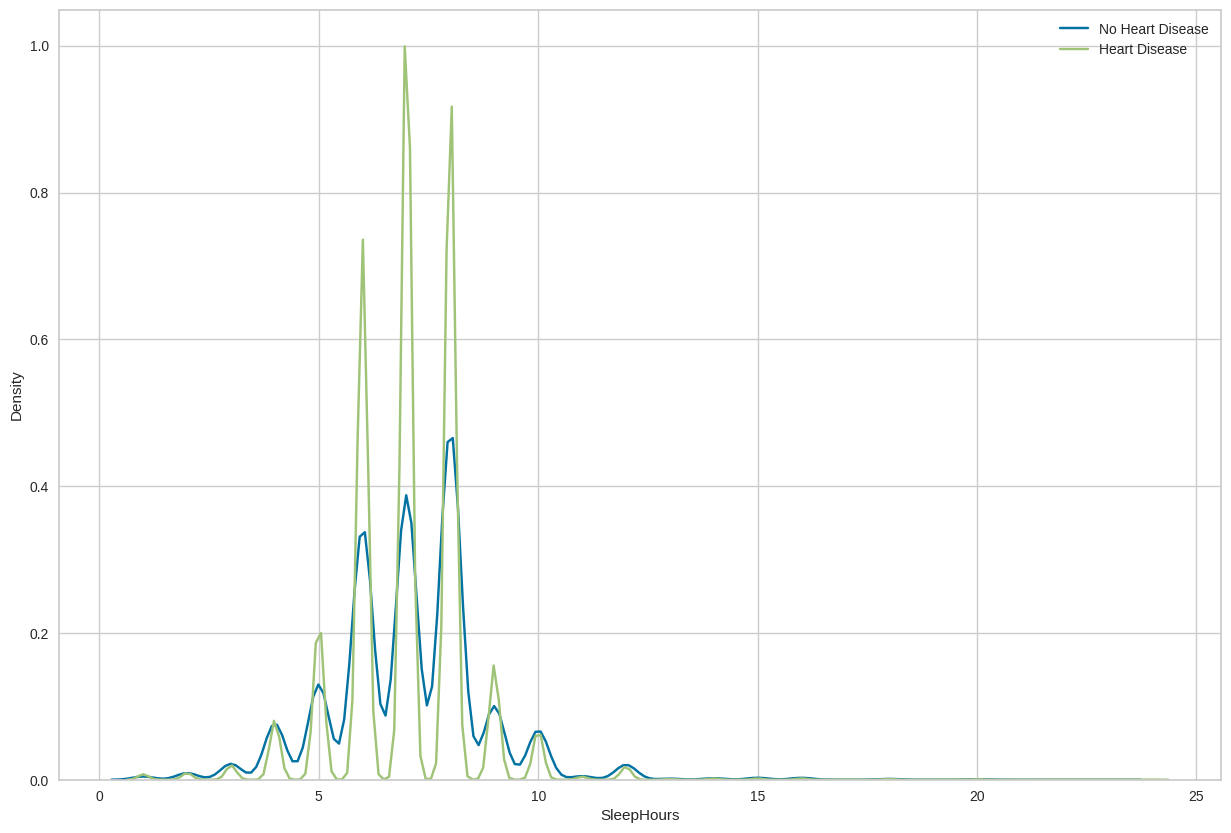

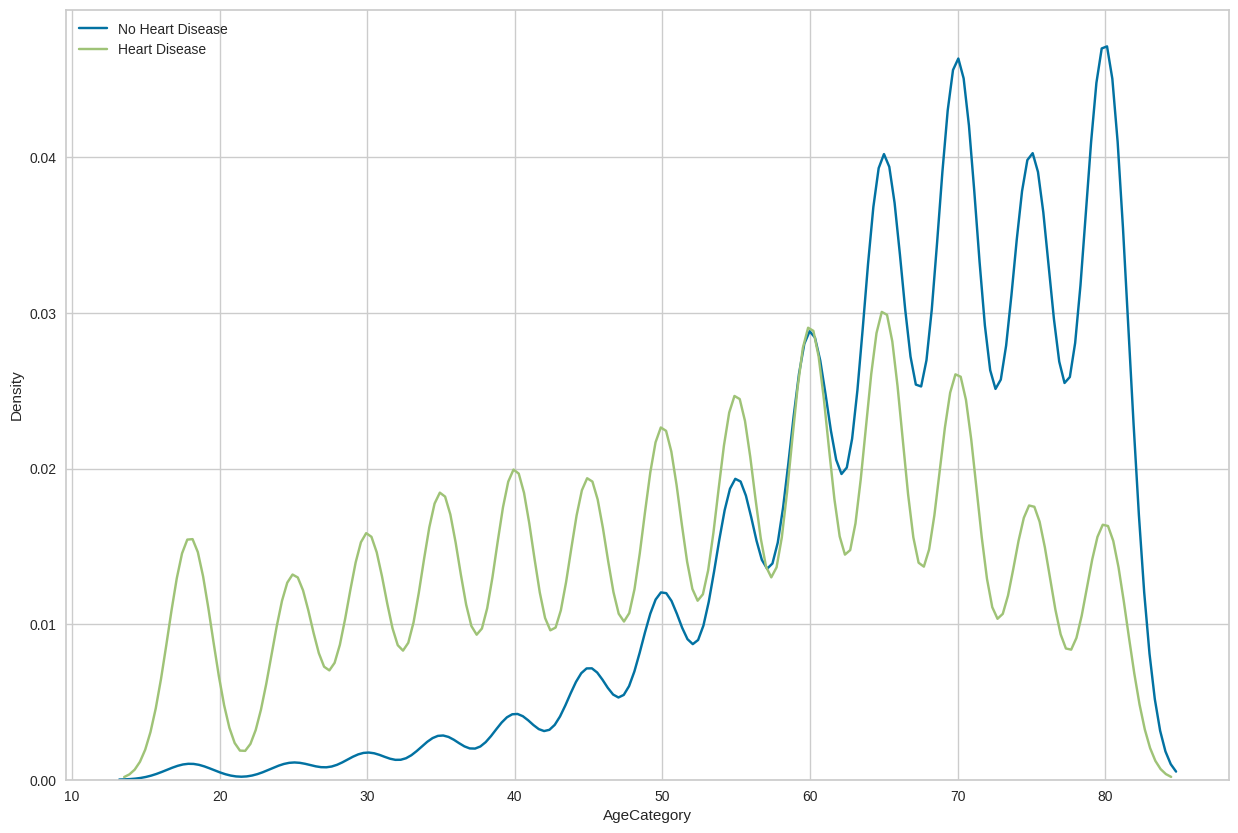

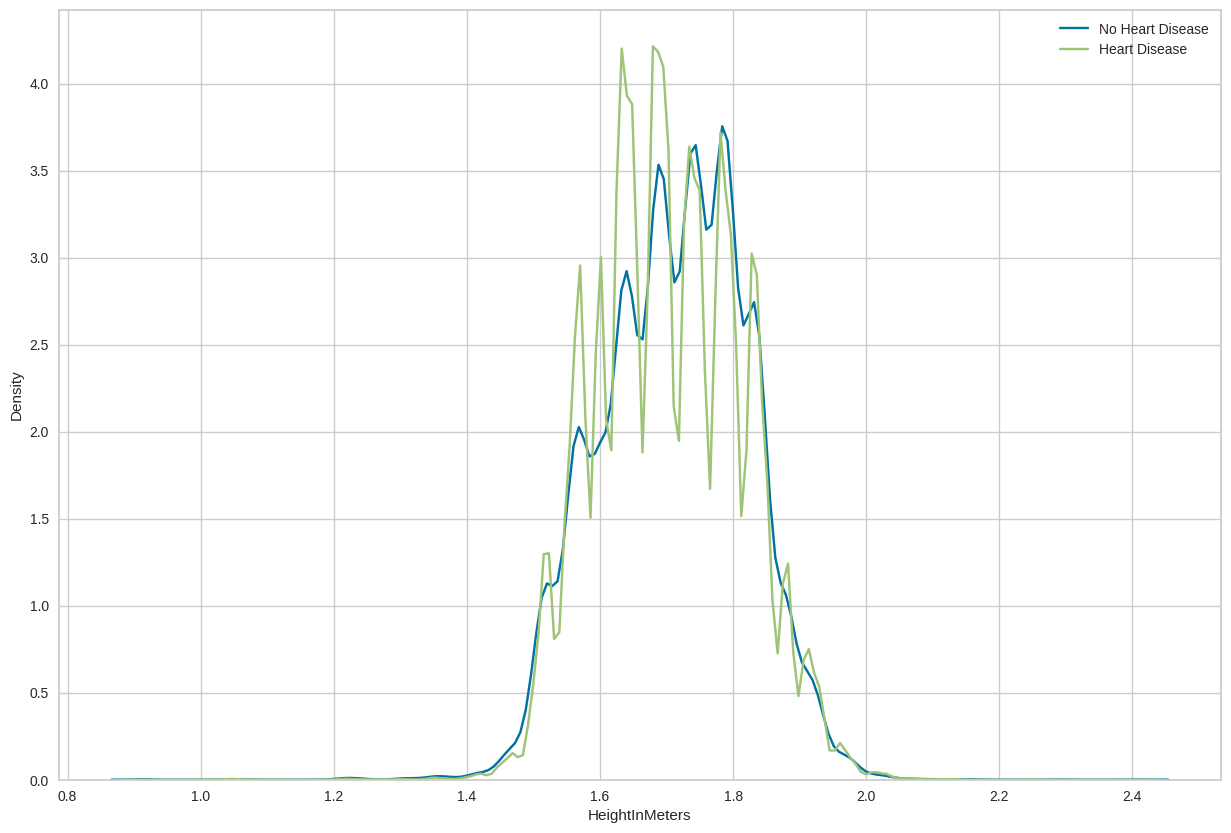

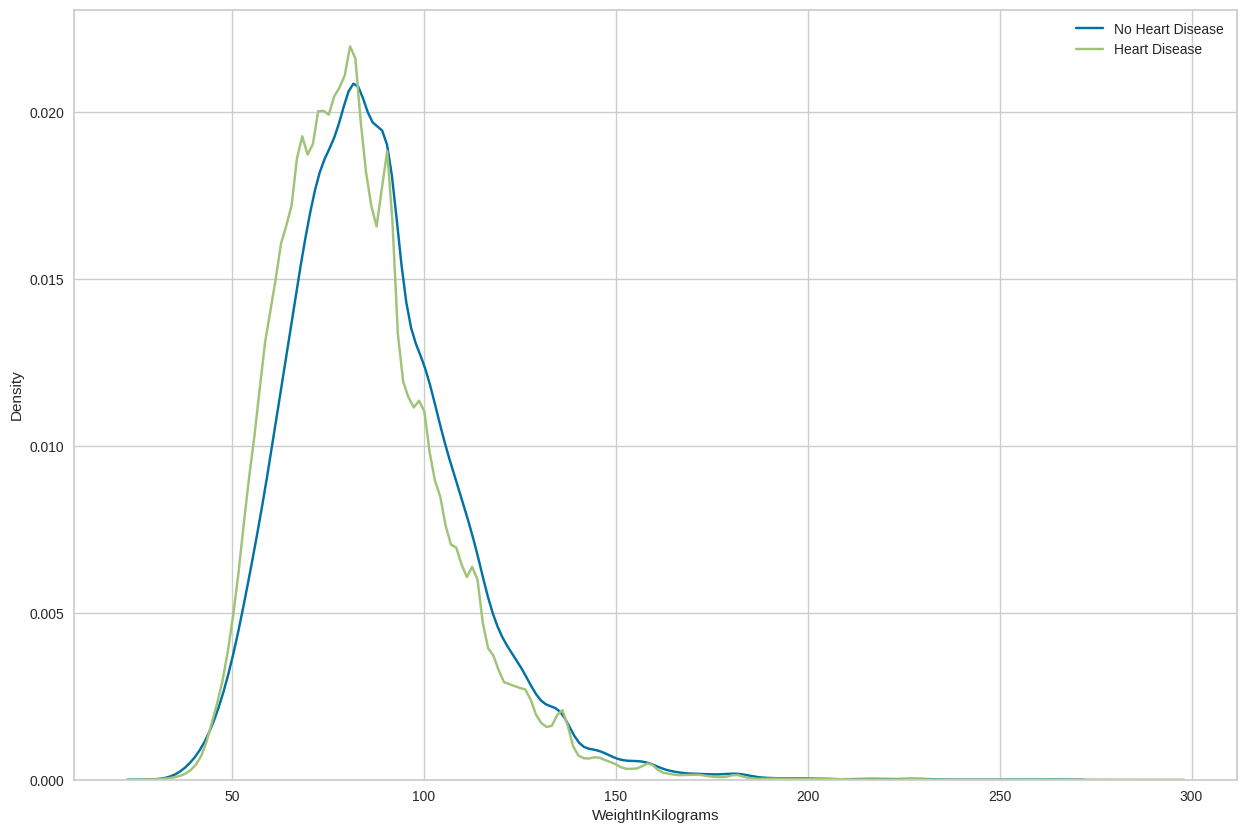

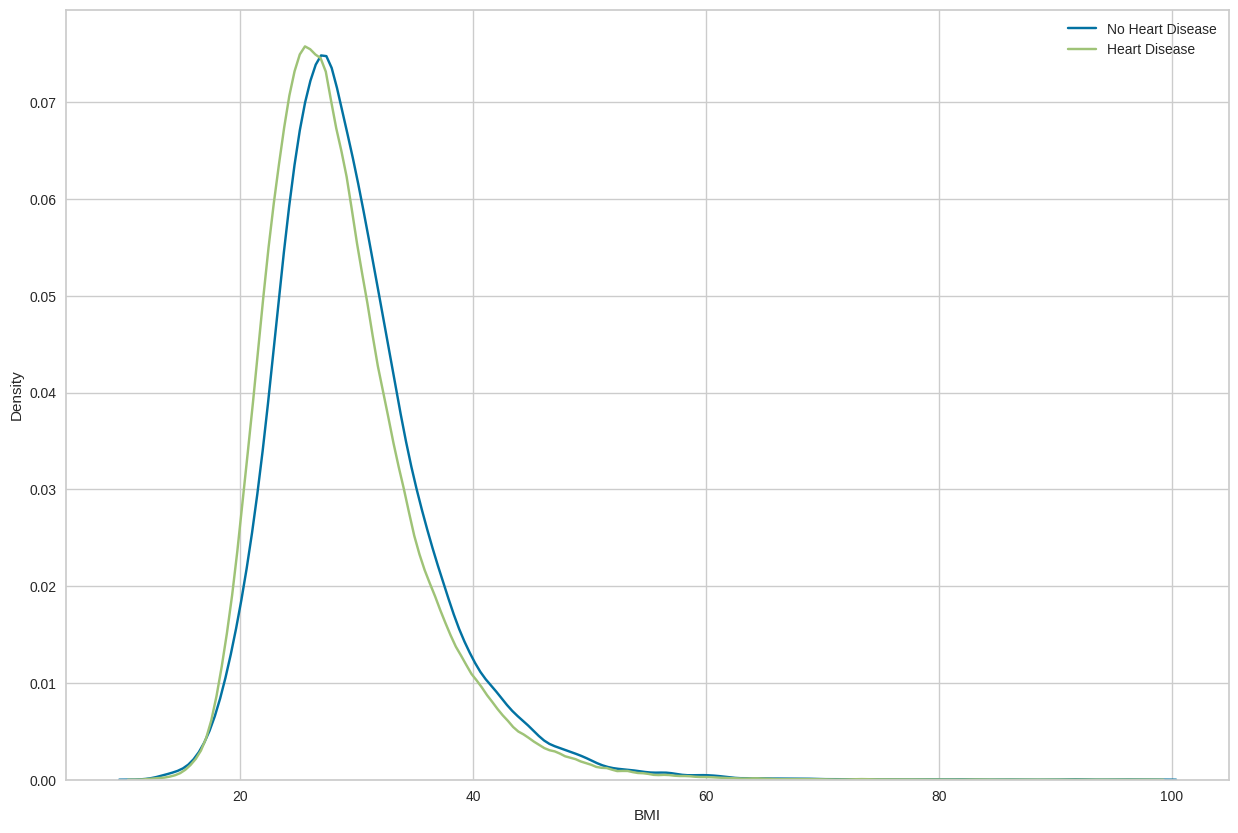

In [119]:
for col in numeric_cols[:-1]:
    f,ax=plt.subplots(1,figsize=(15,10))
    sns.kdeplot(df[df['HeartDisease']==1][col],ax=ax)
    sns.kdeplot(df[df['HeartDisease']==0][col],ax=ax)
    plt.legend(labels=['No Heart Disease', 'Heart Disease'])

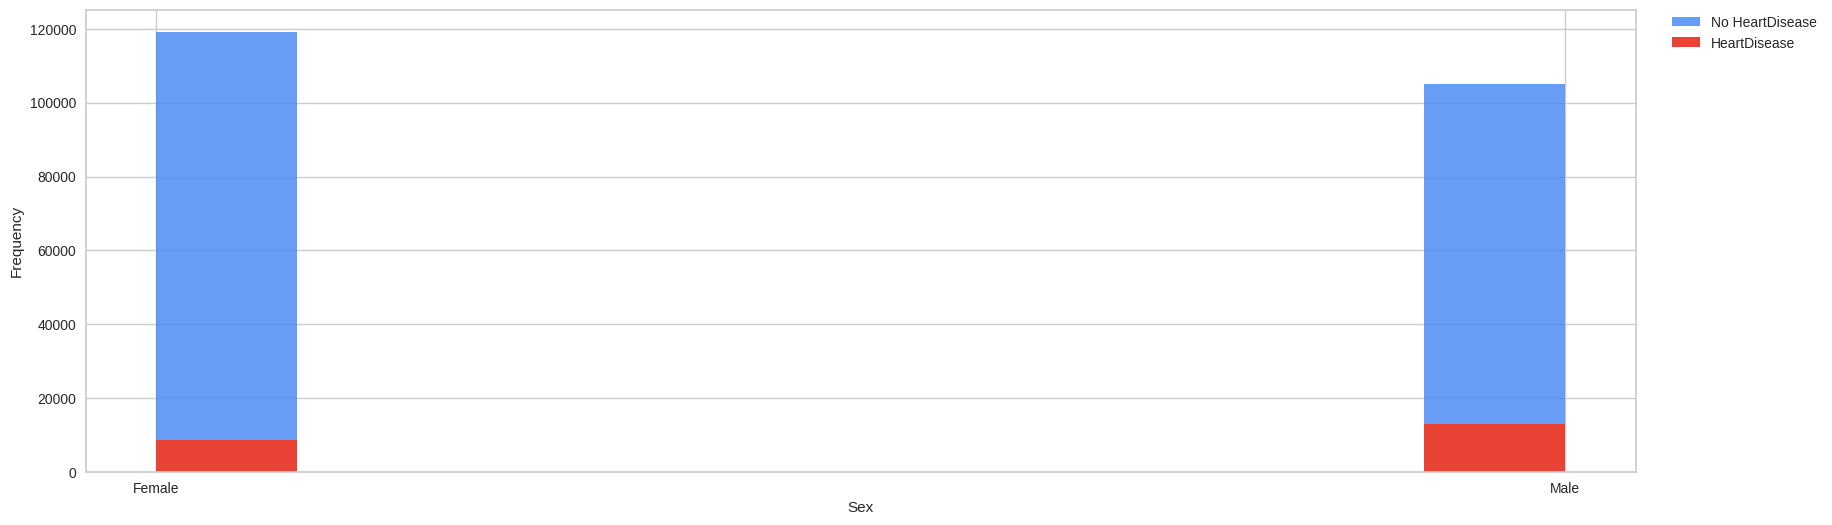

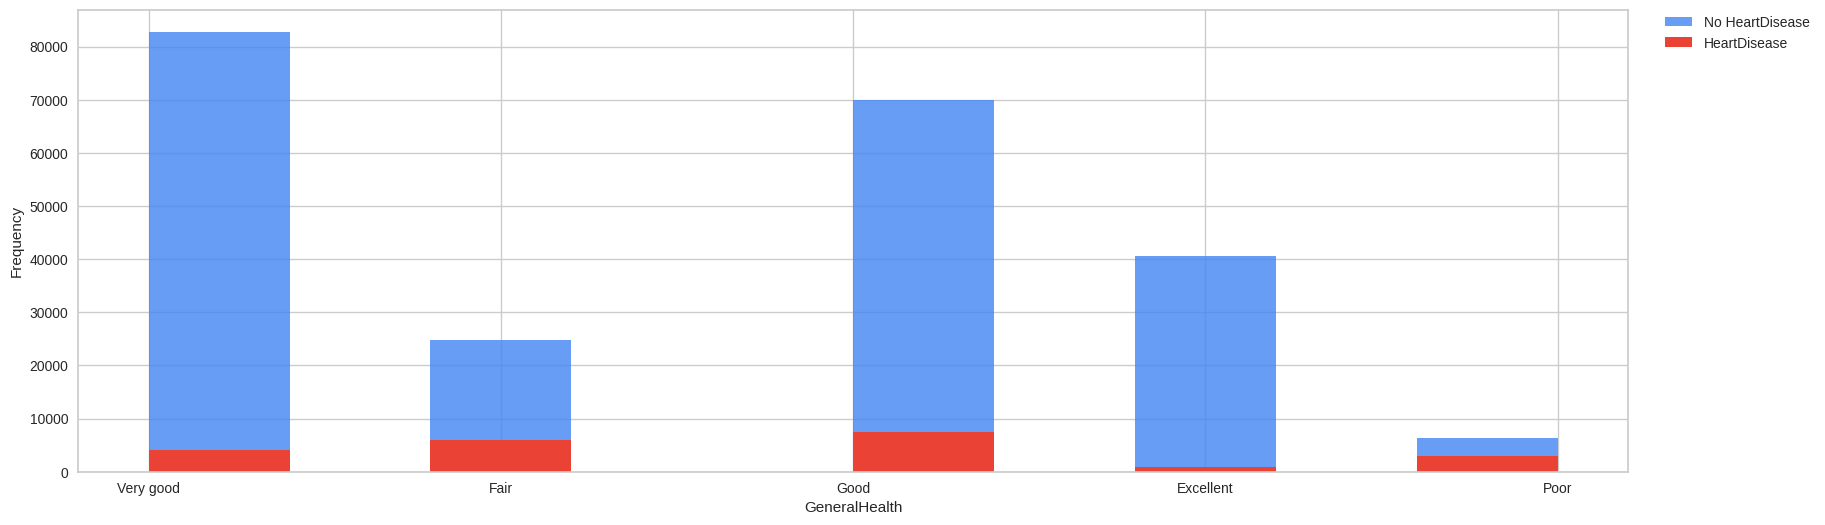

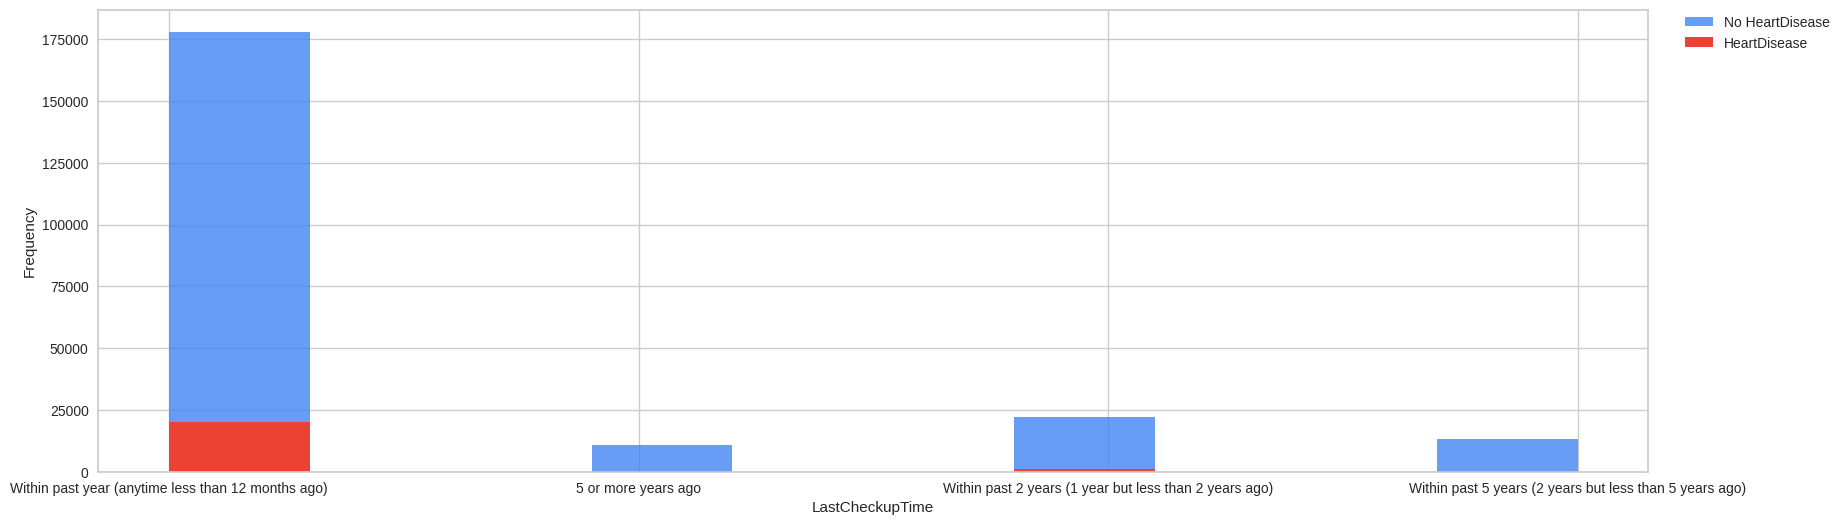

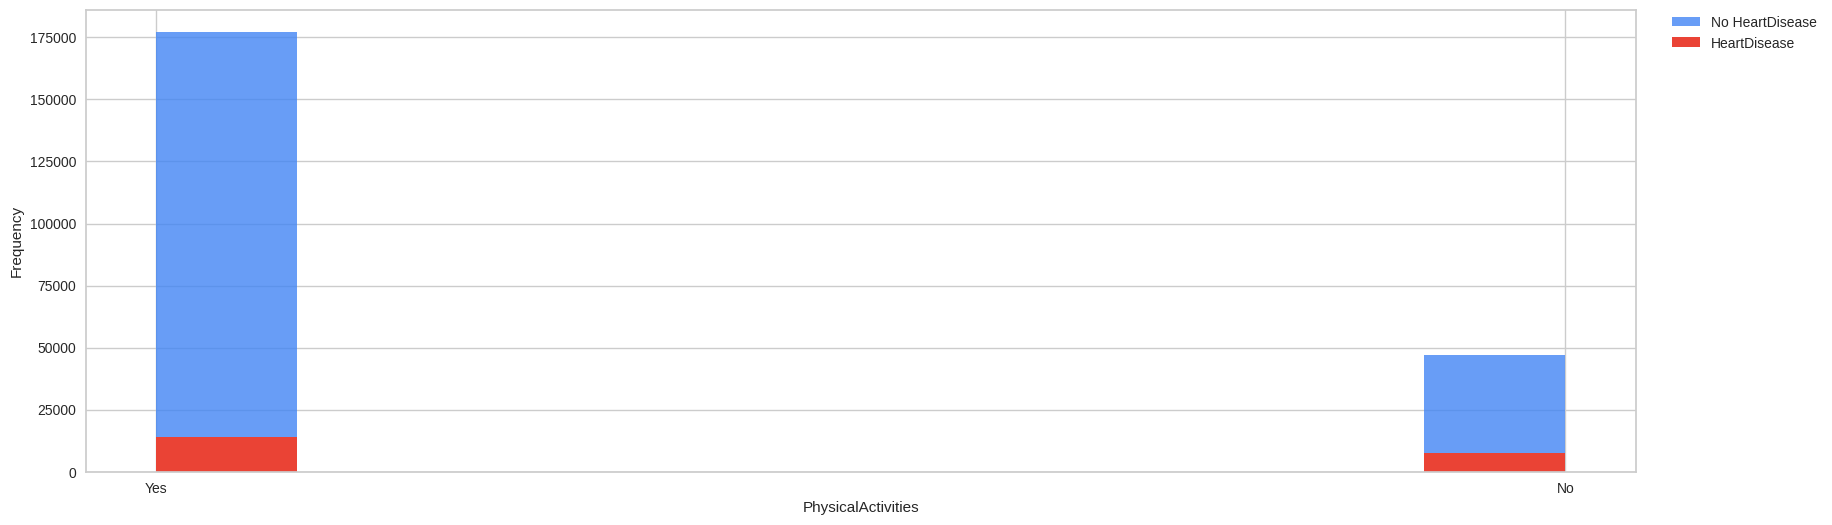

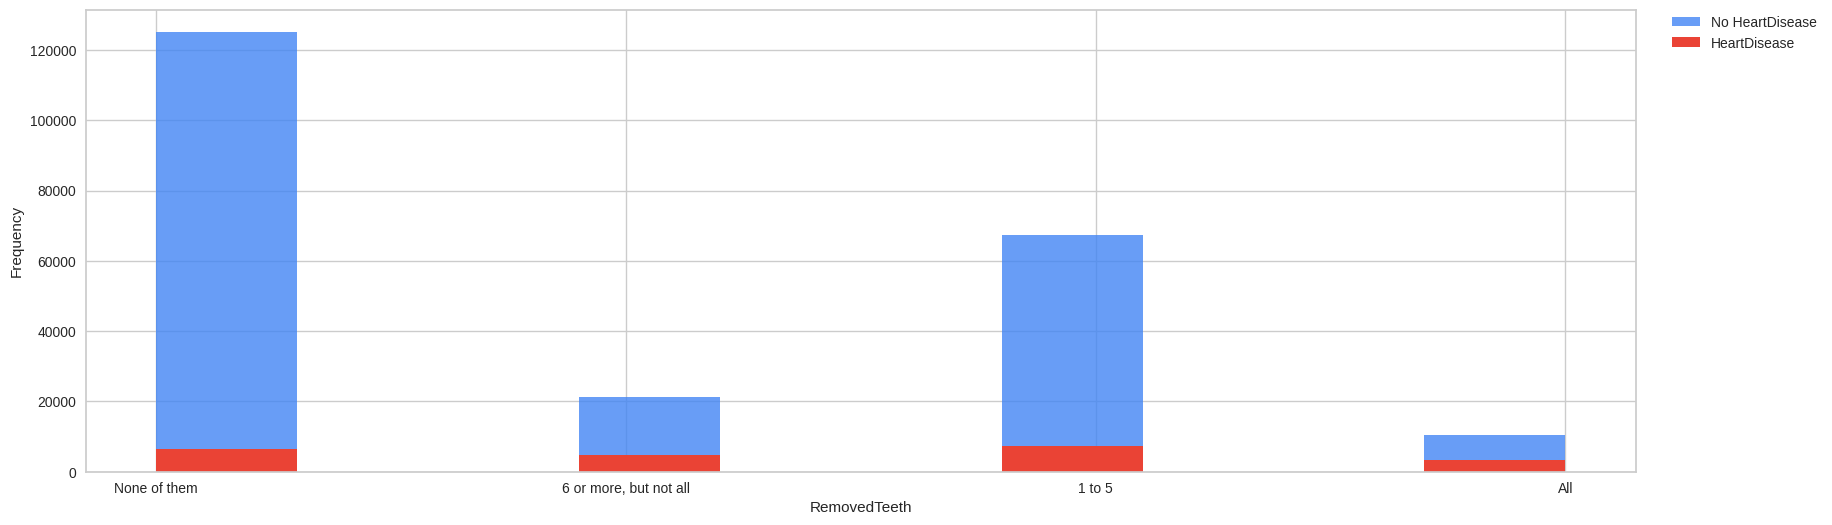

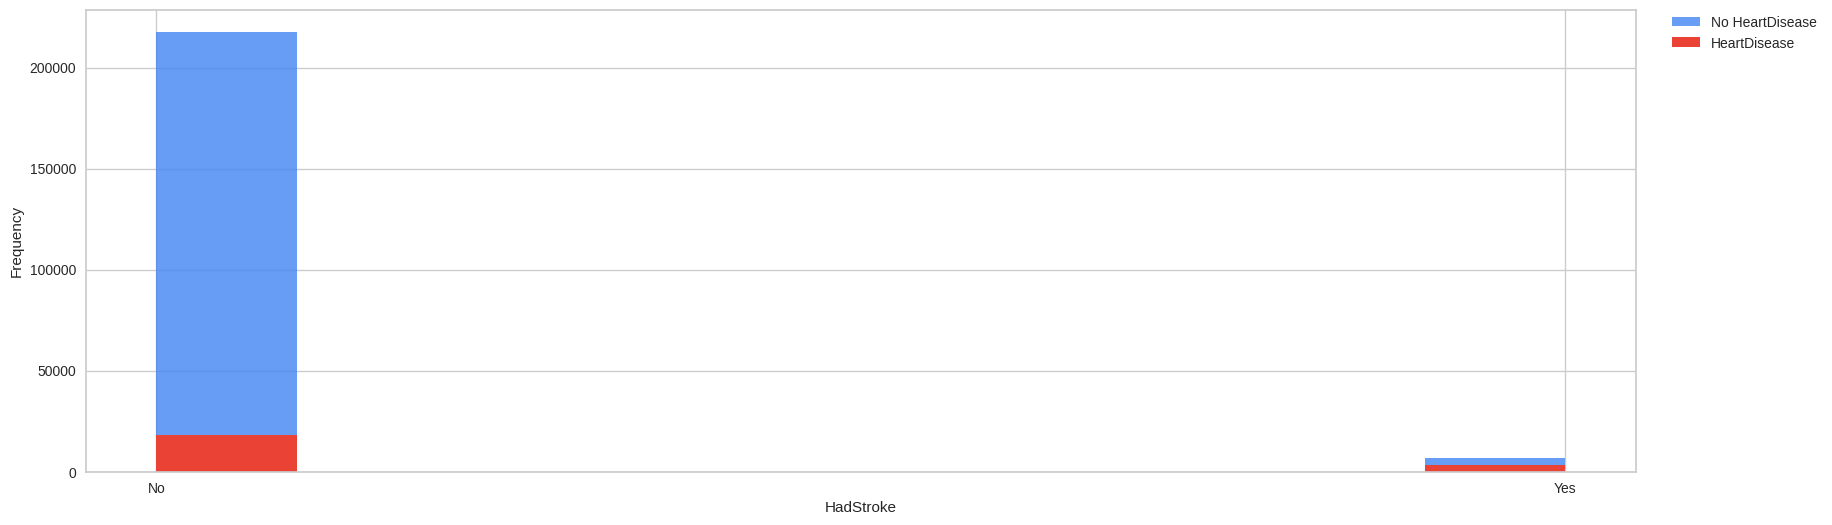

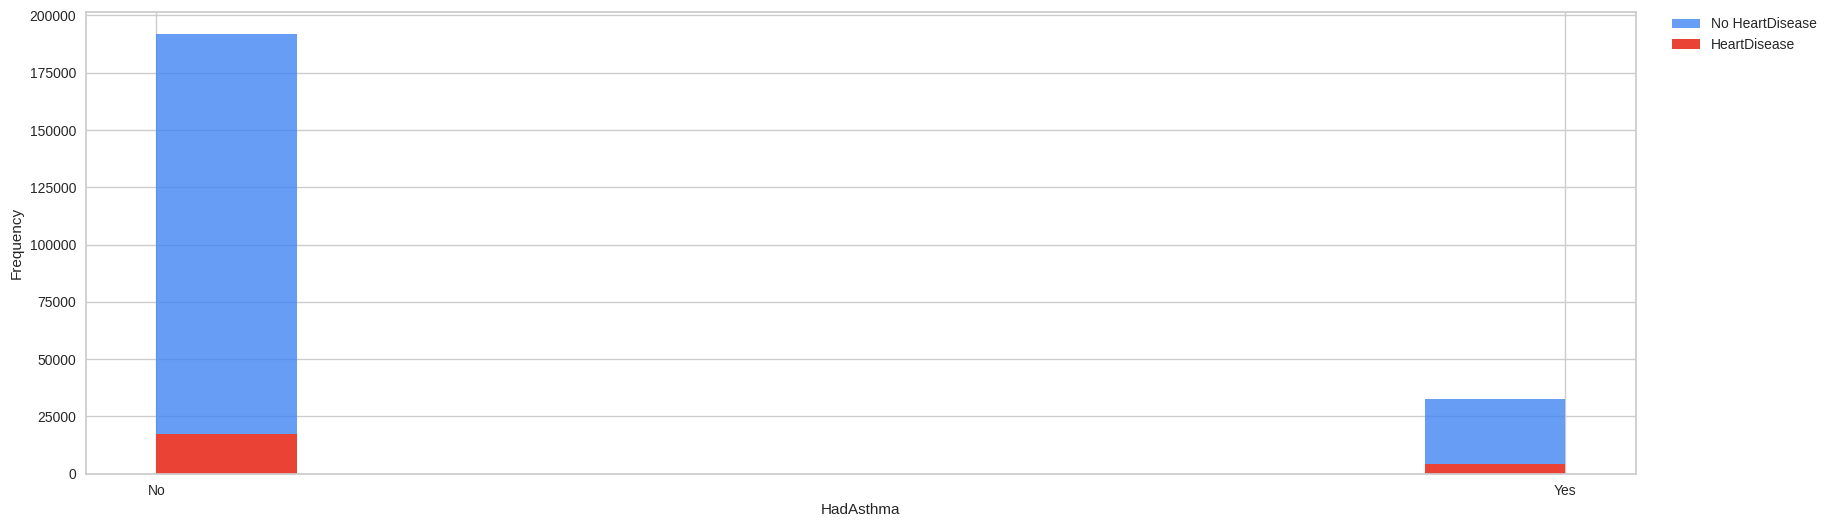

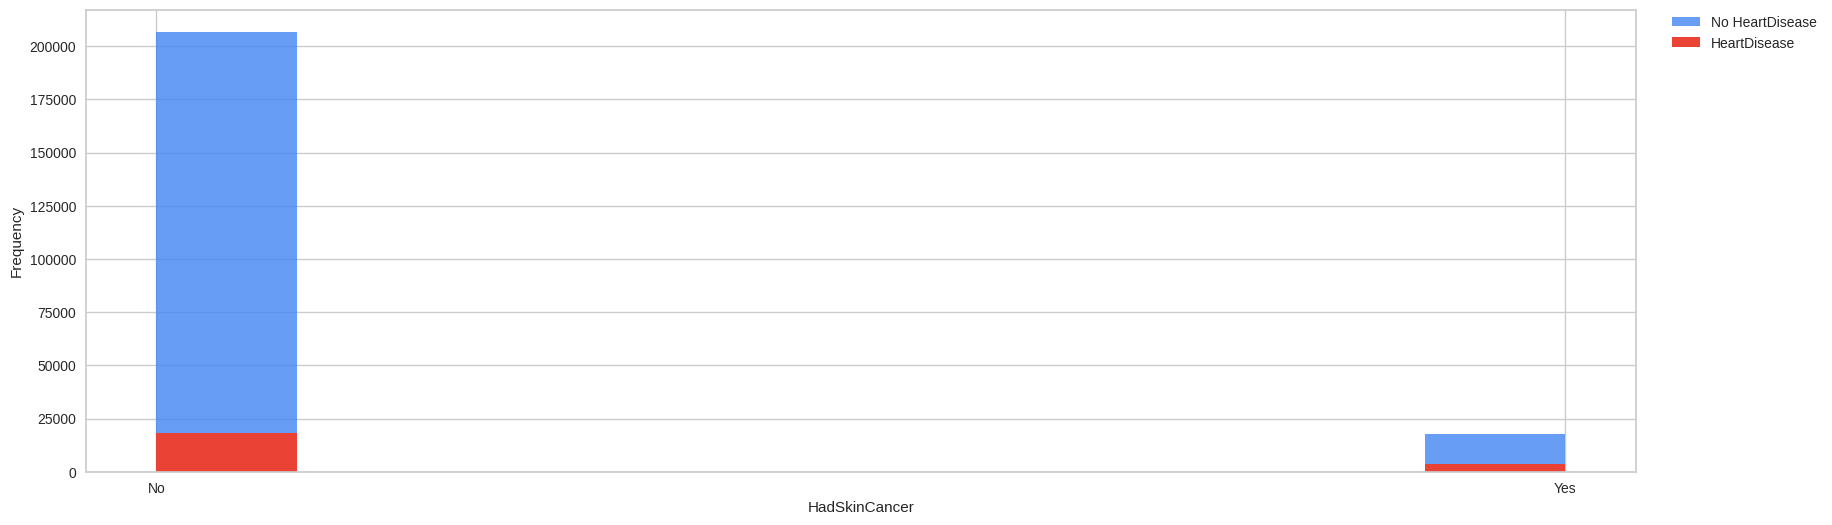

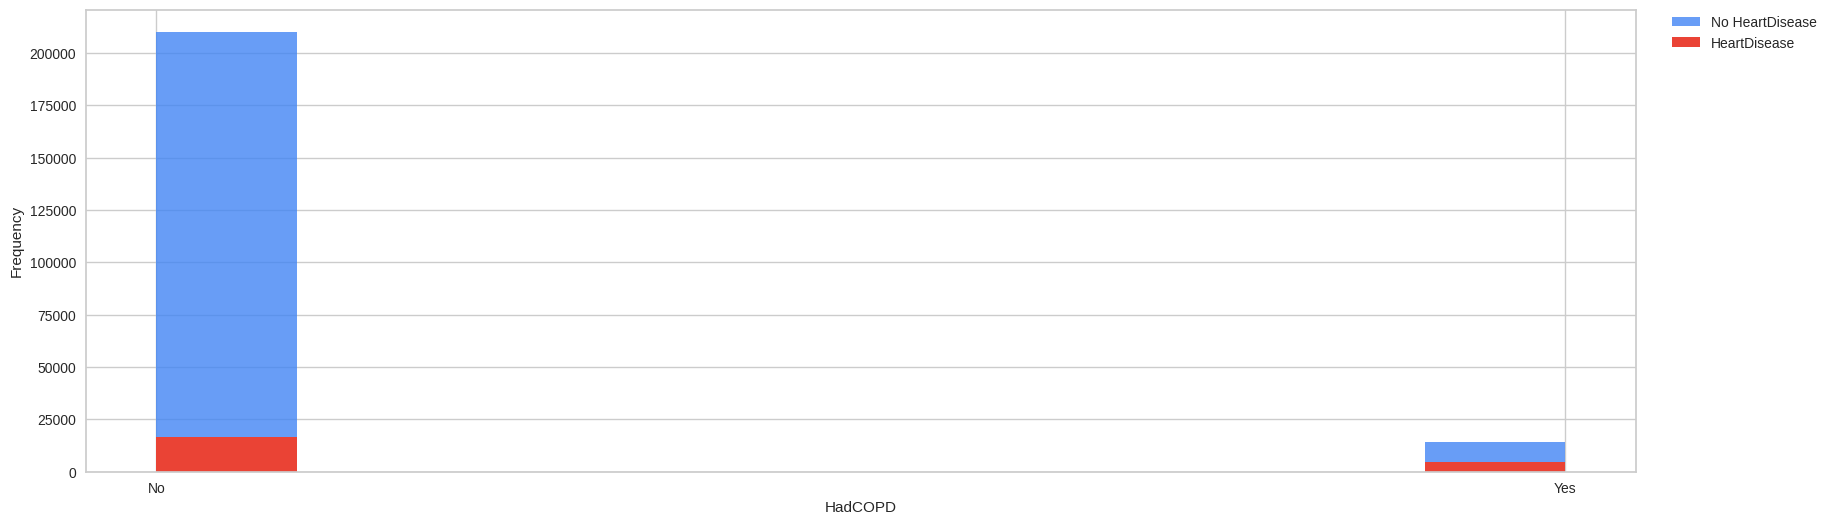

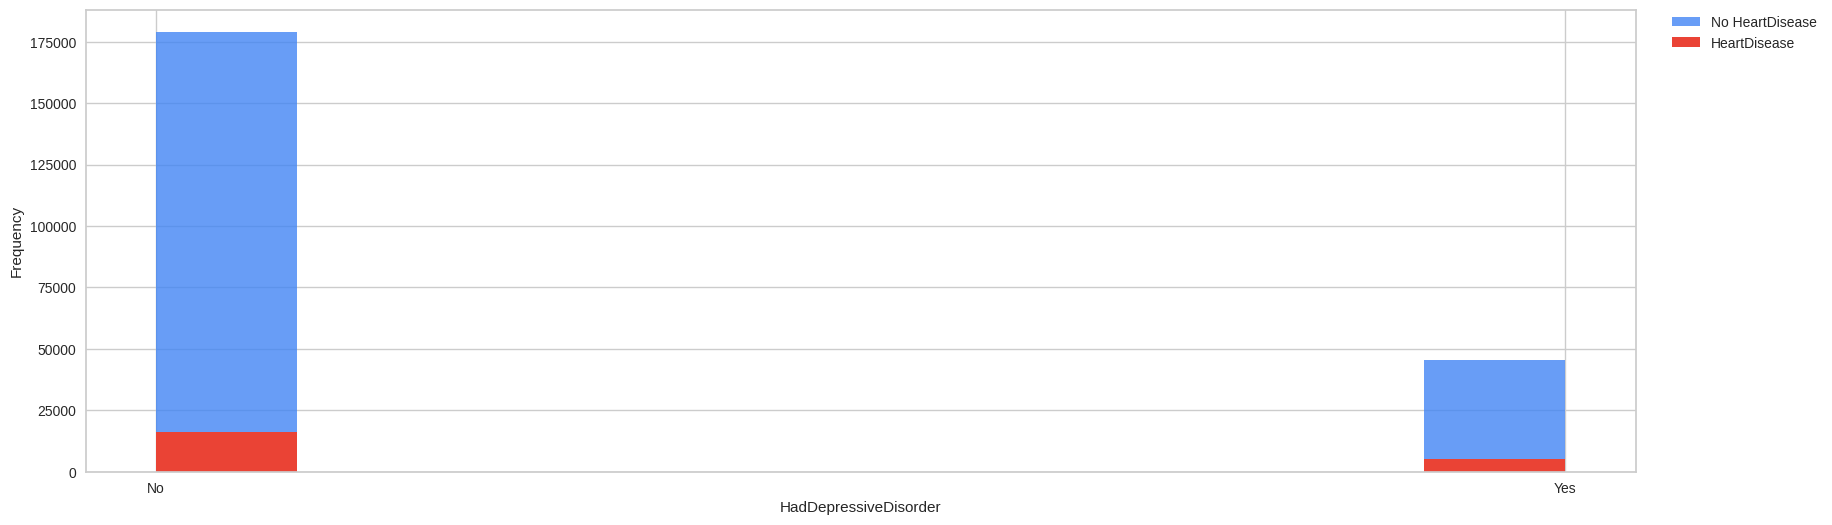

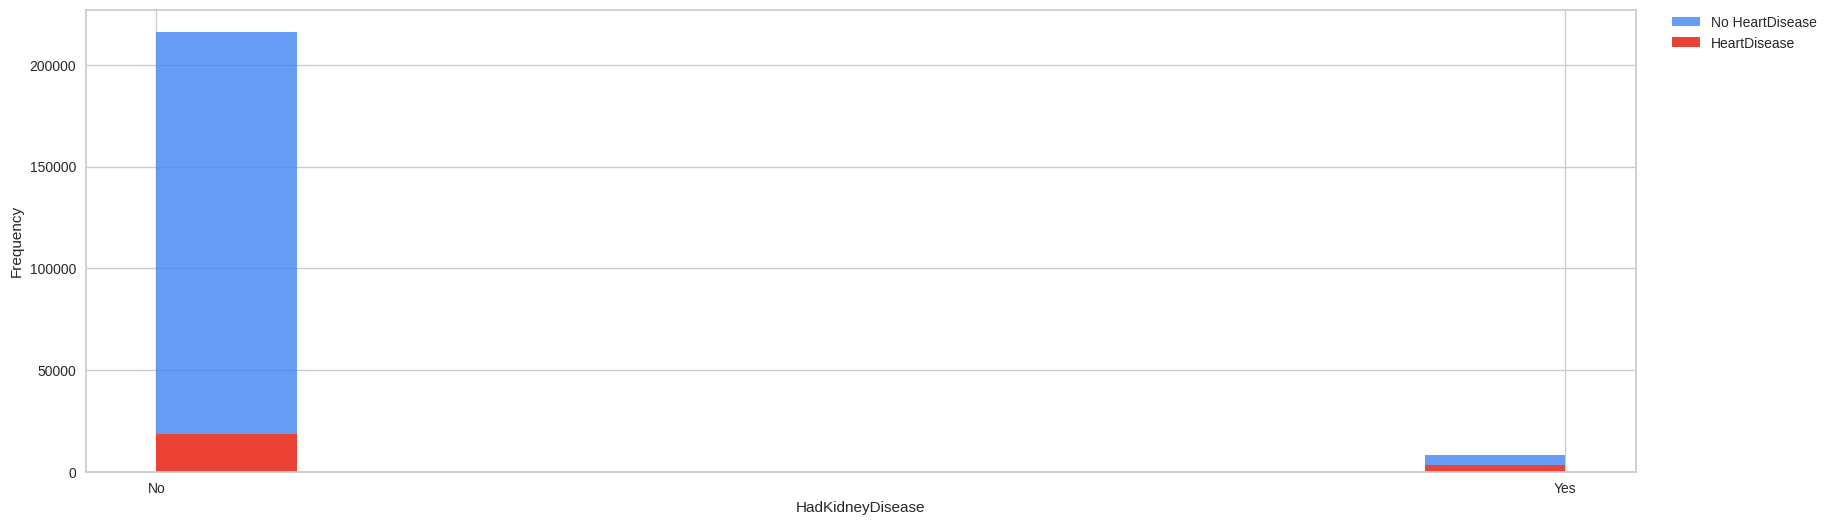

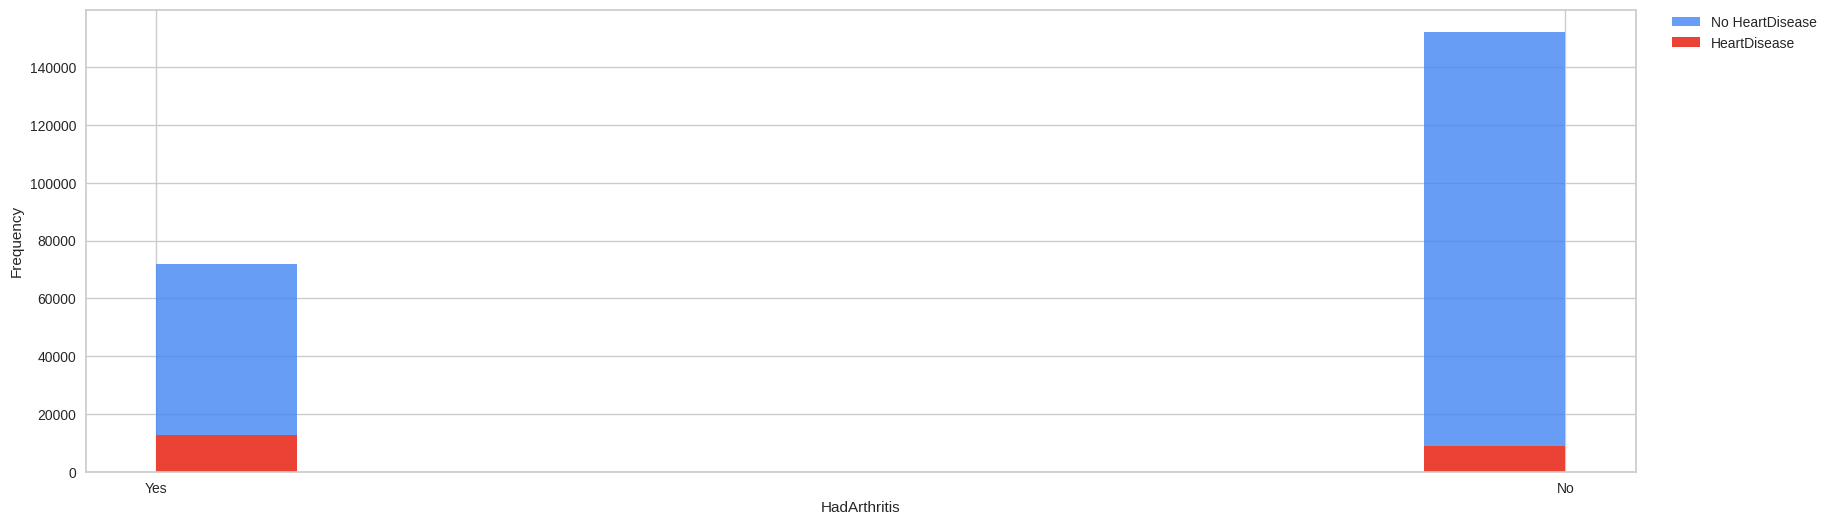

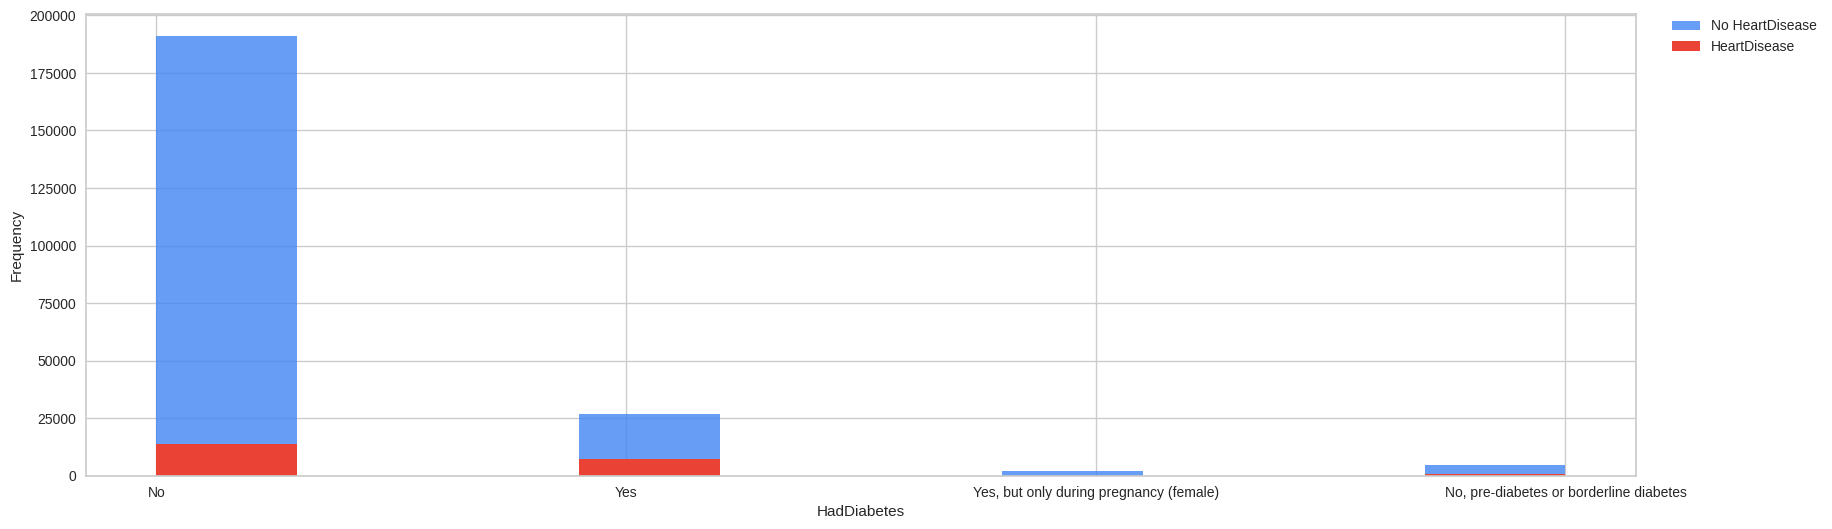

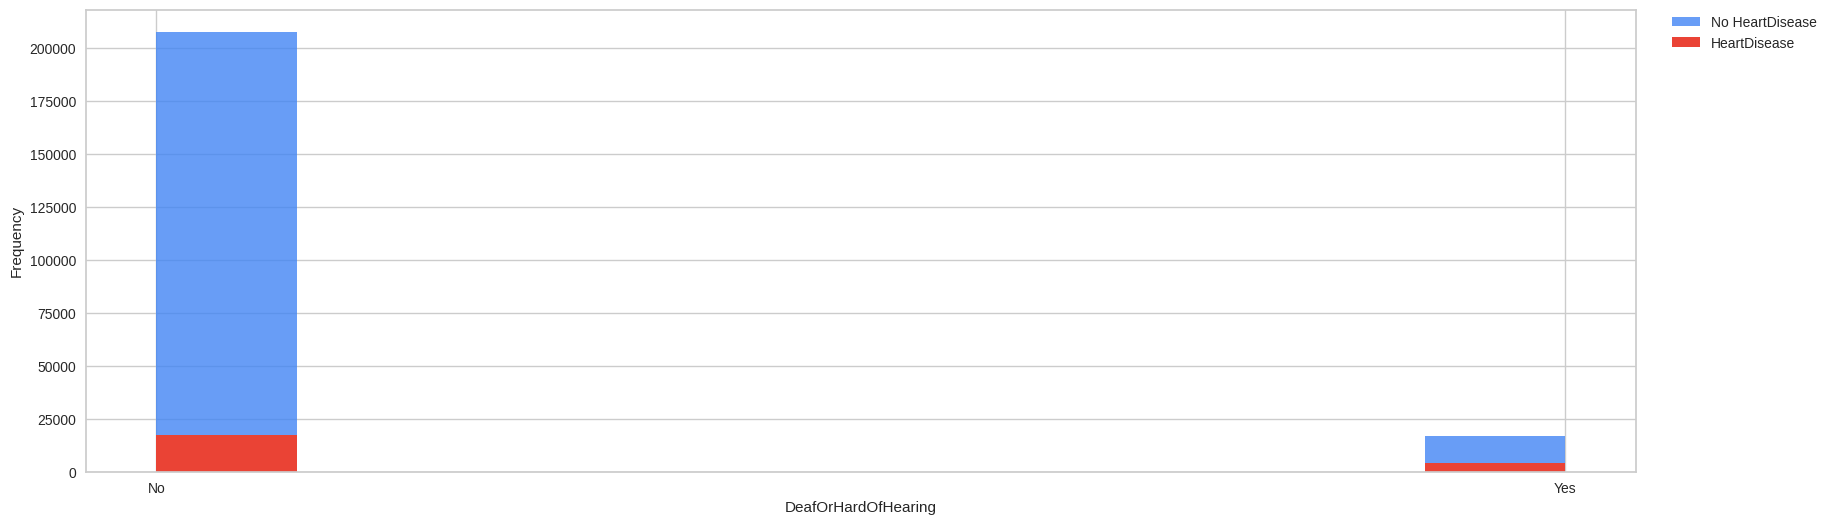

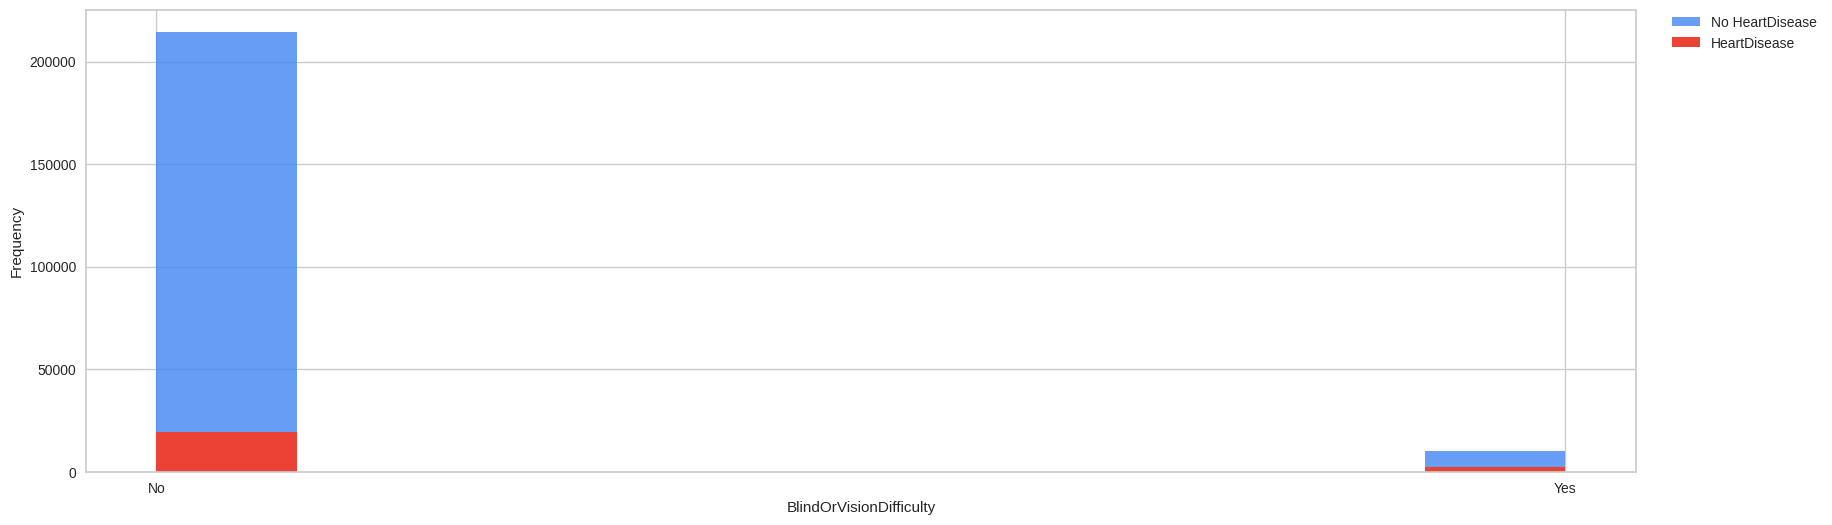

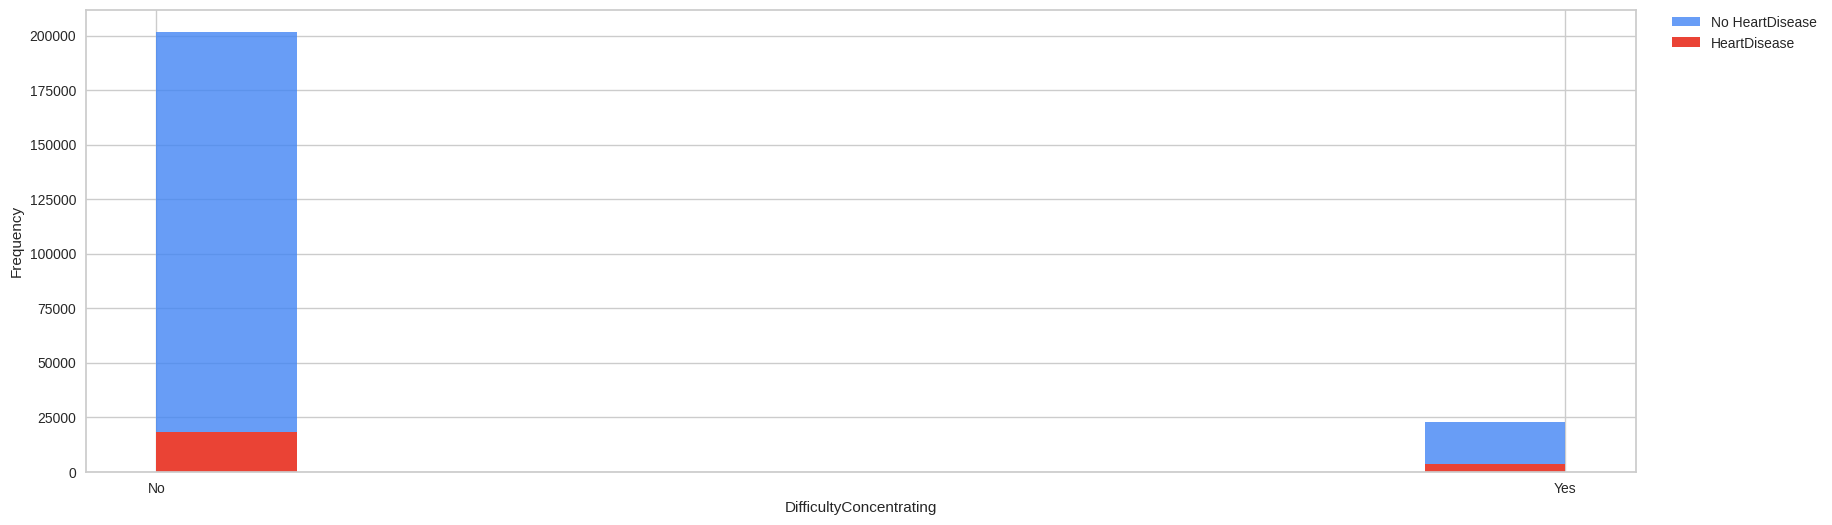

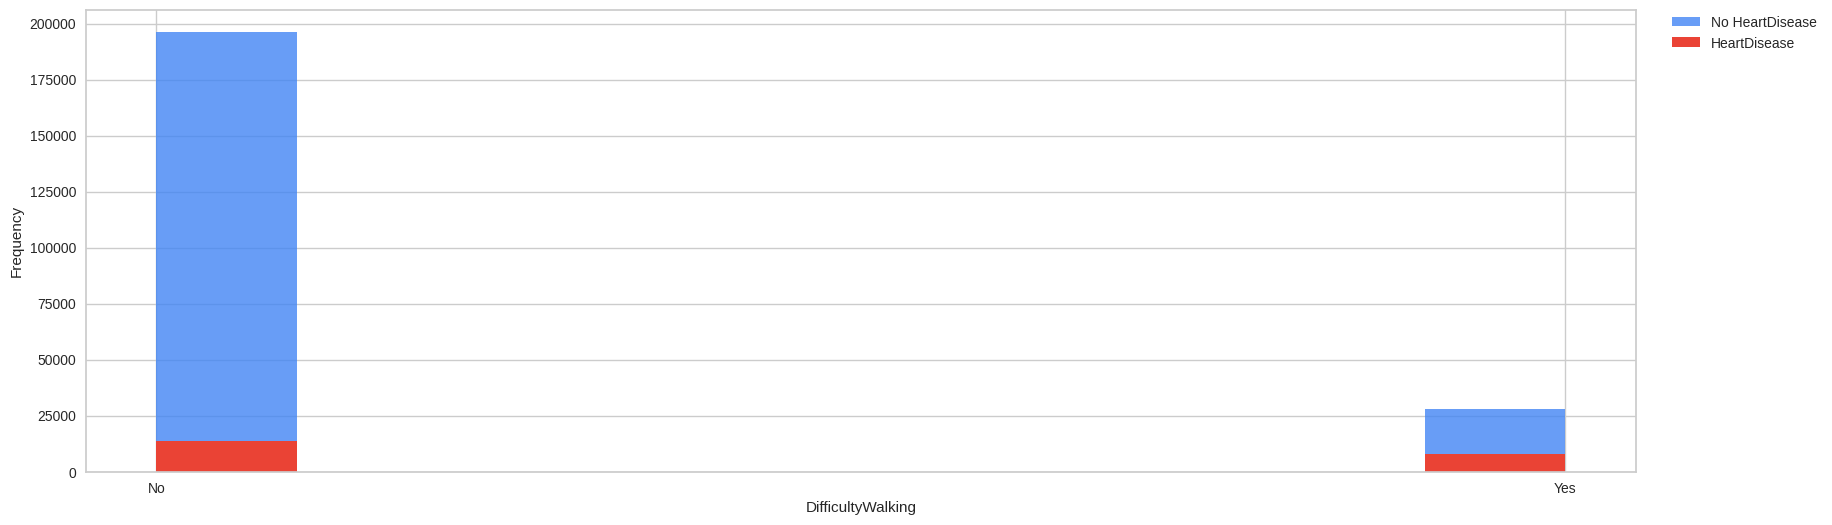

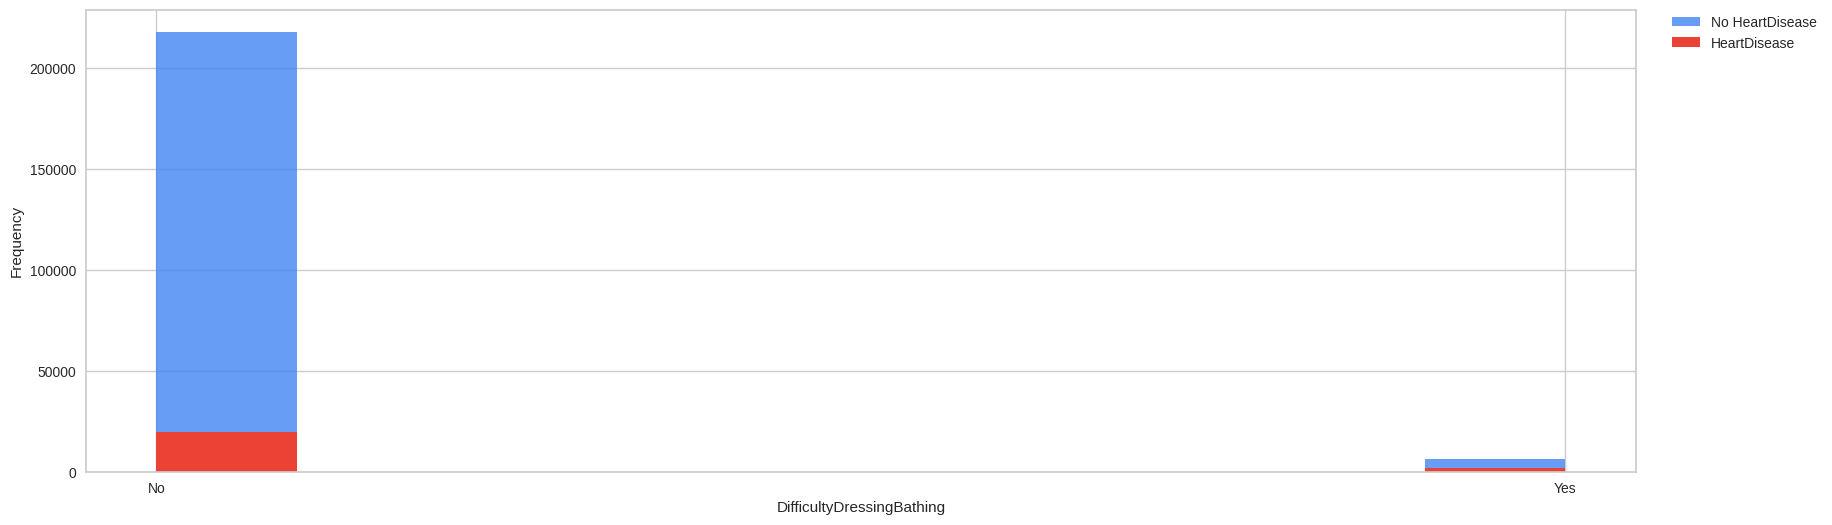

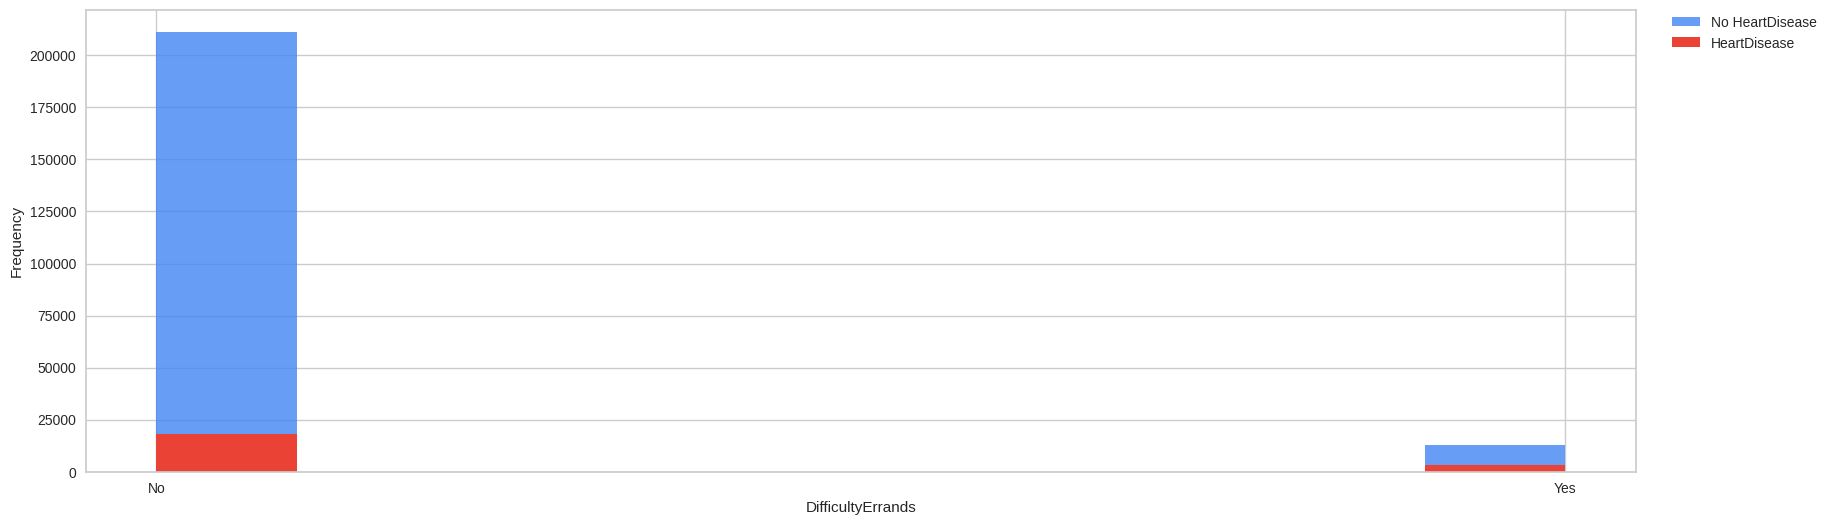

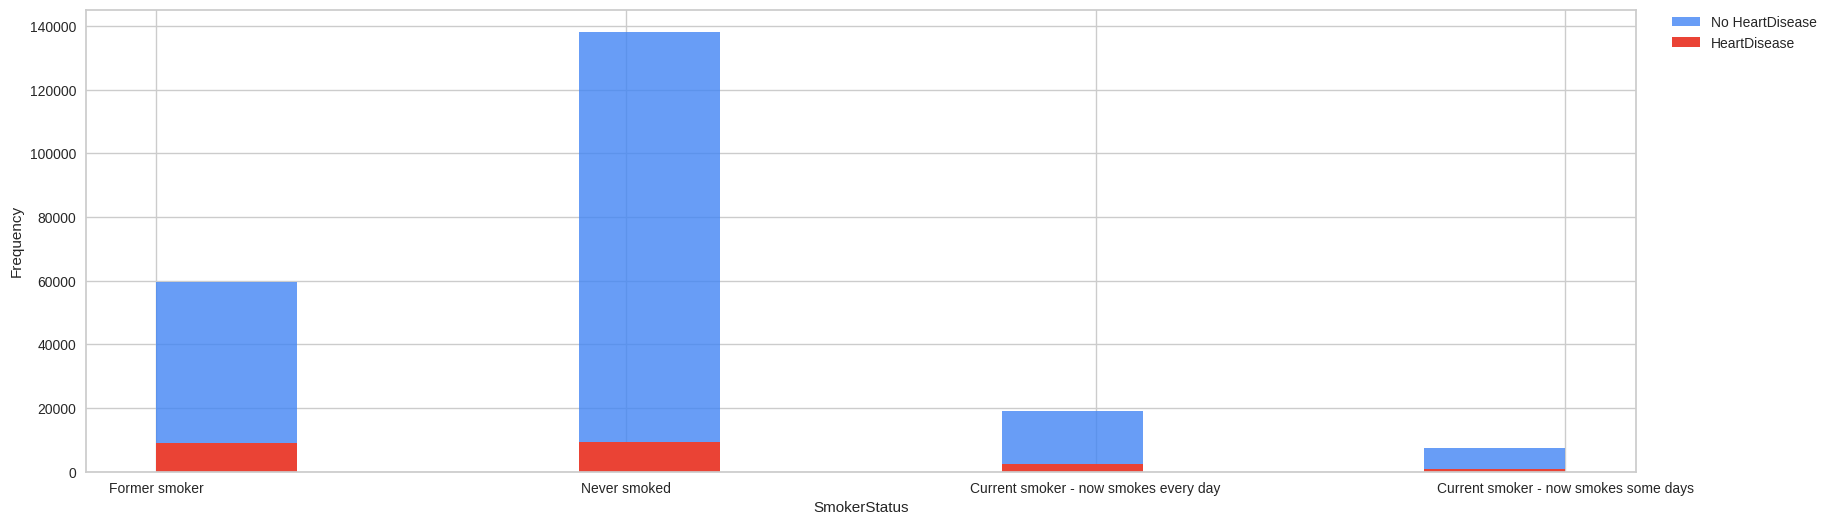

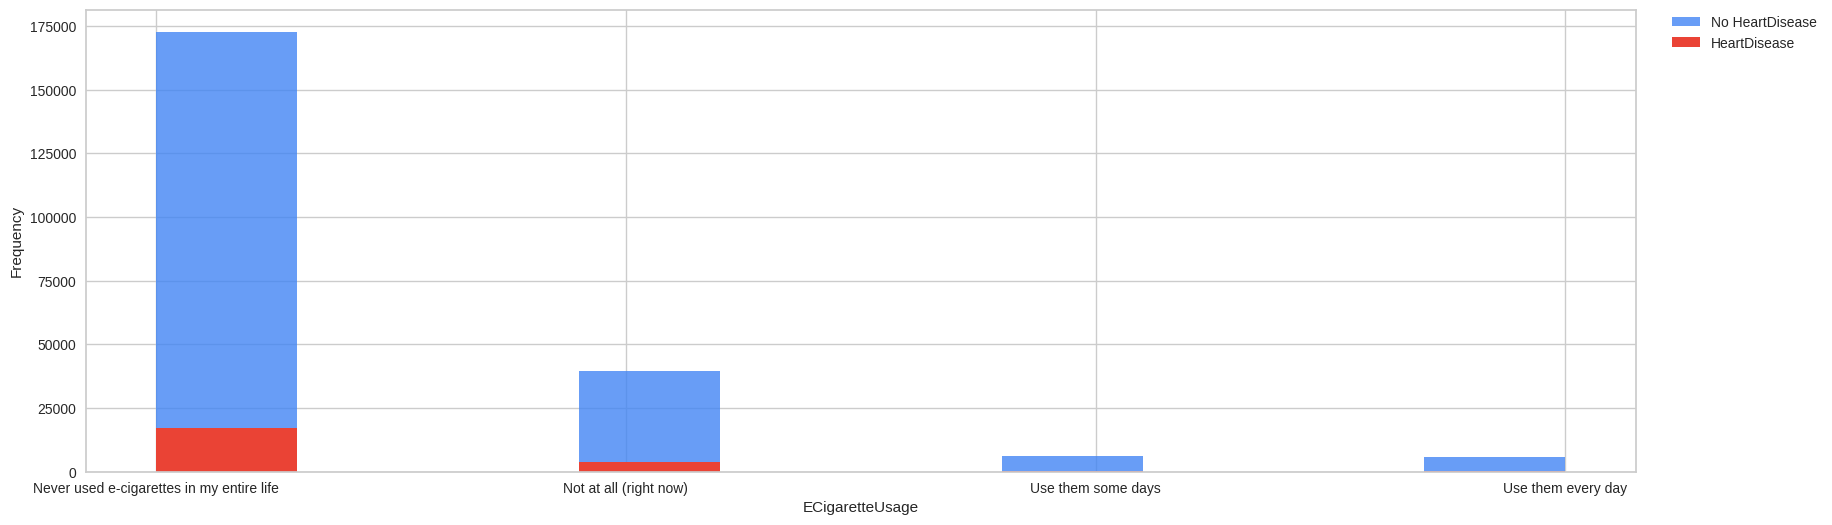

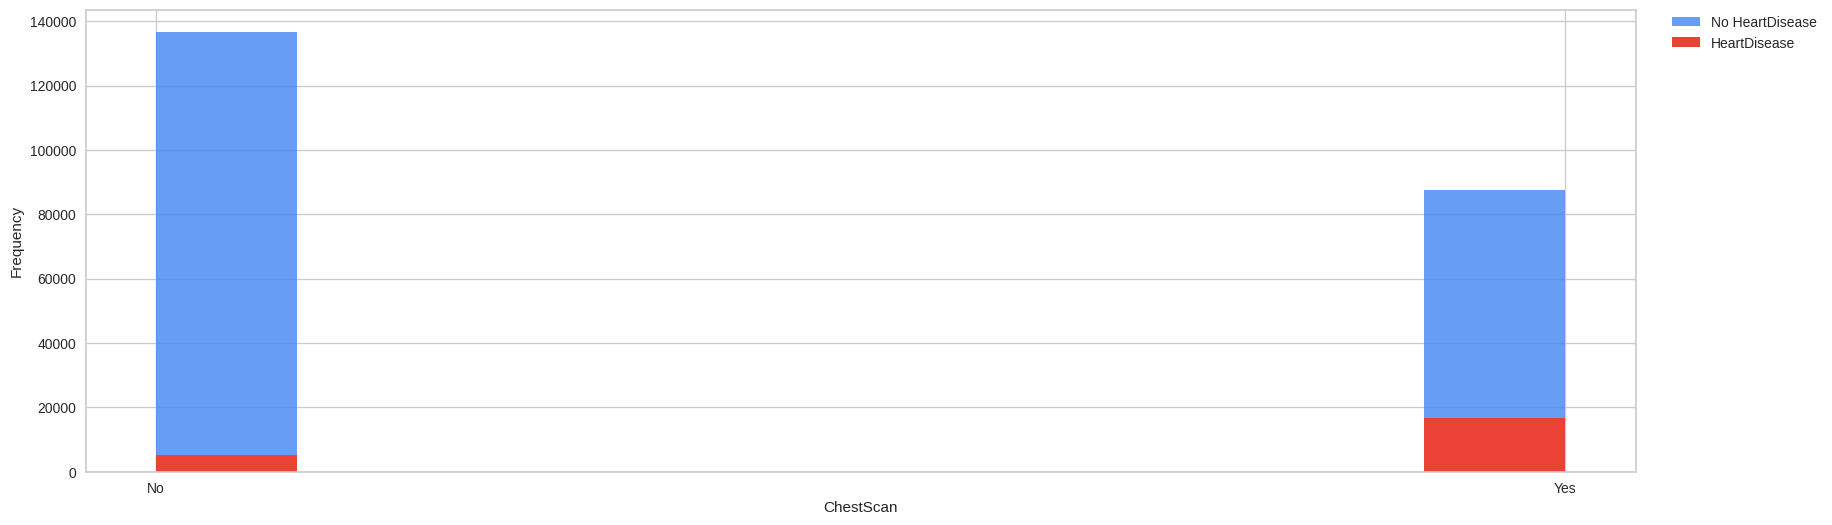

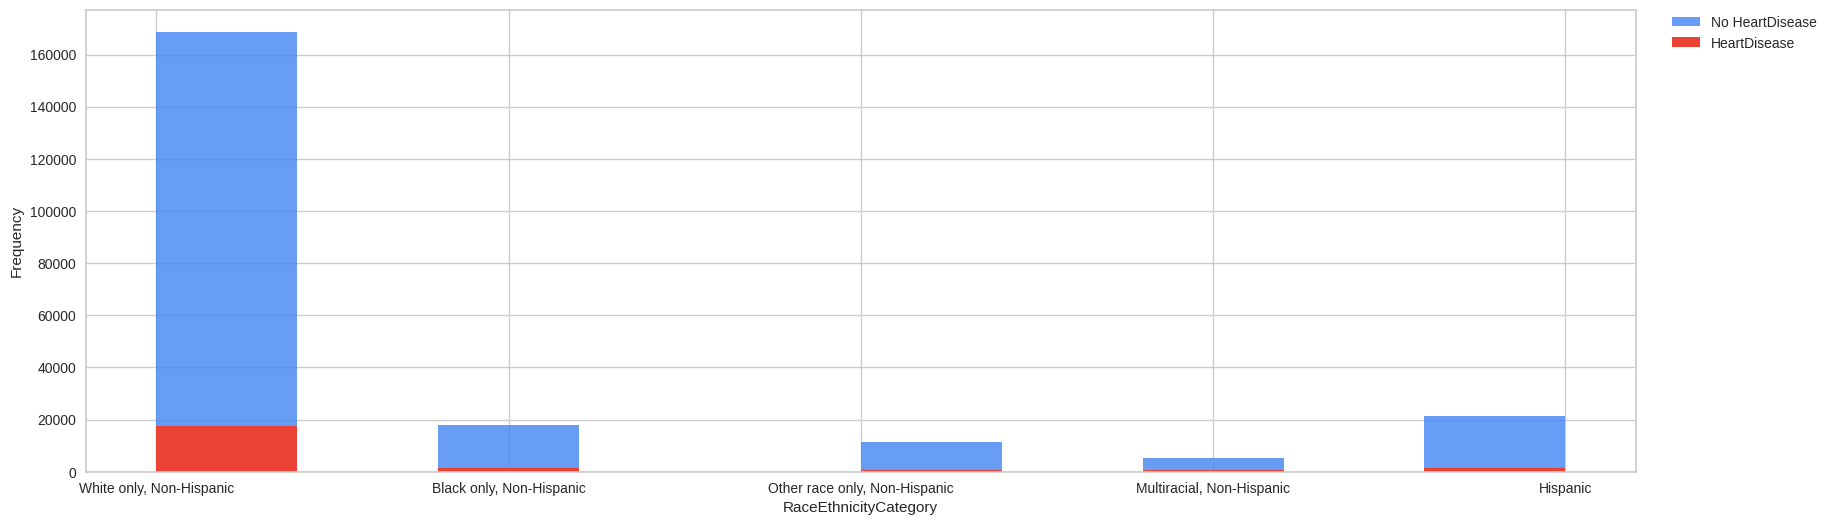

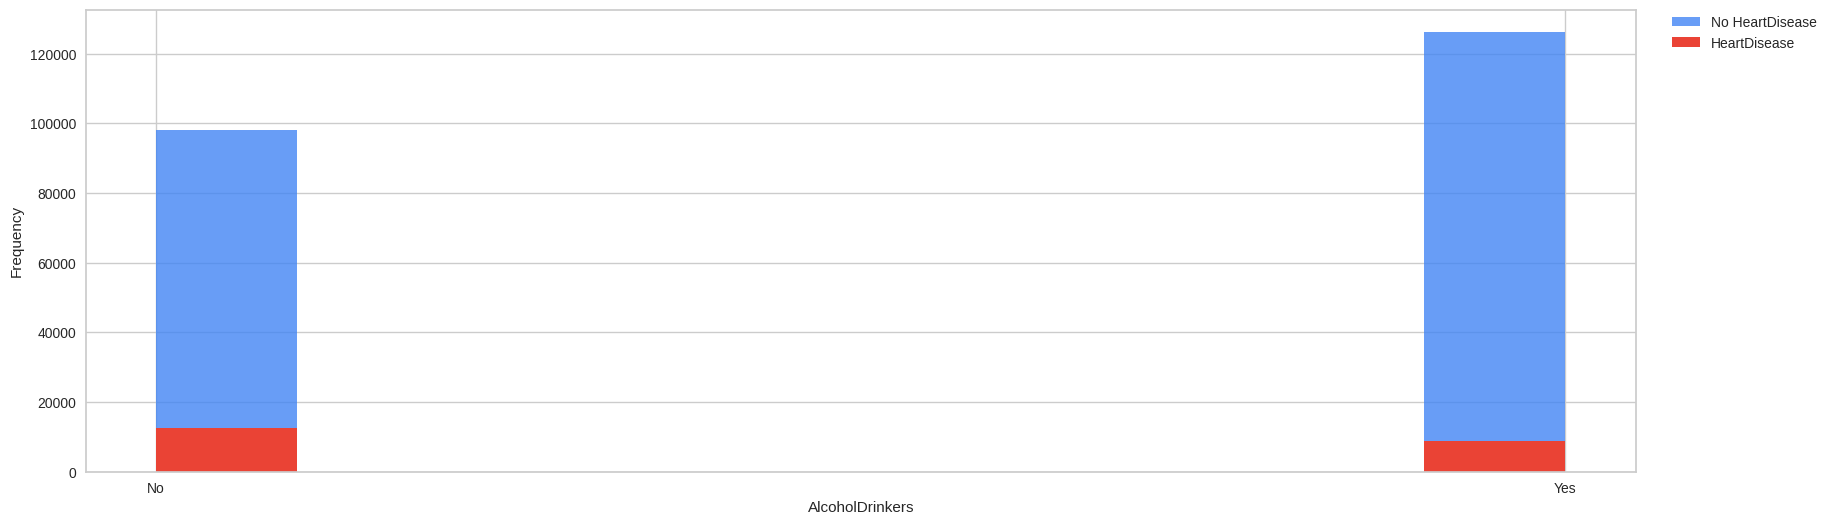

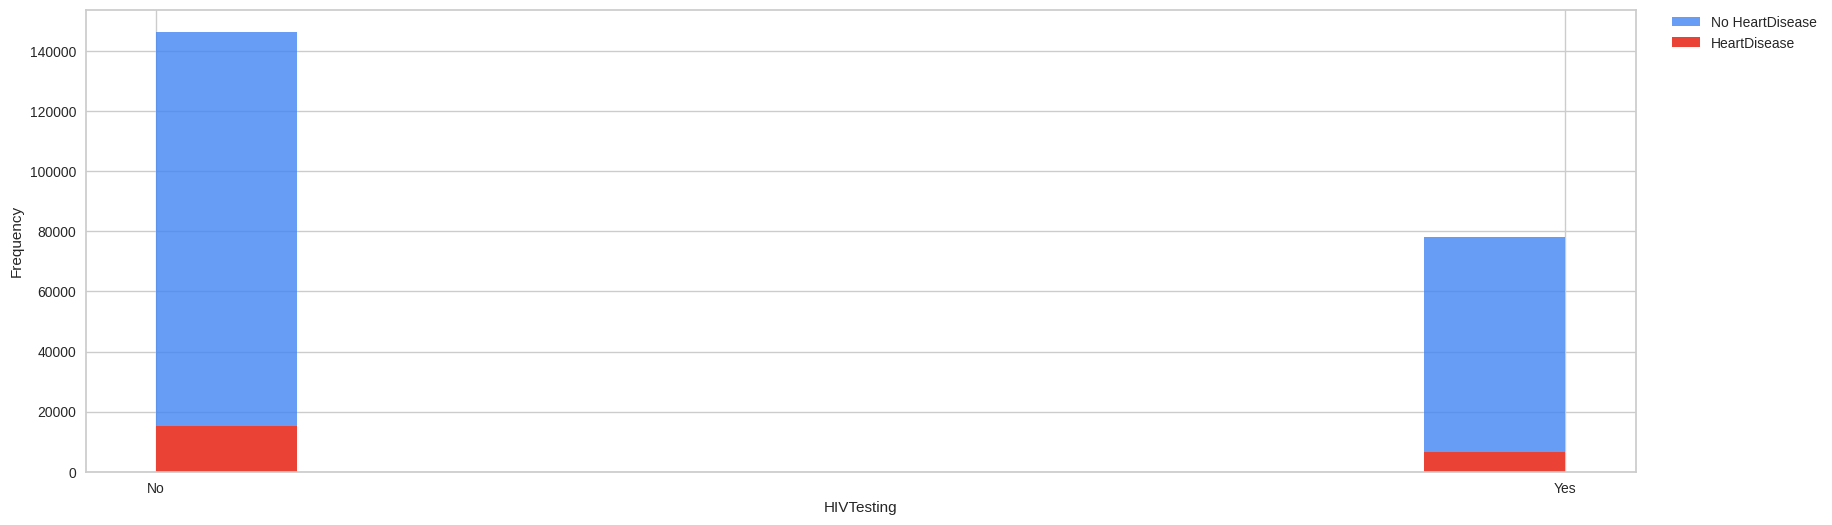

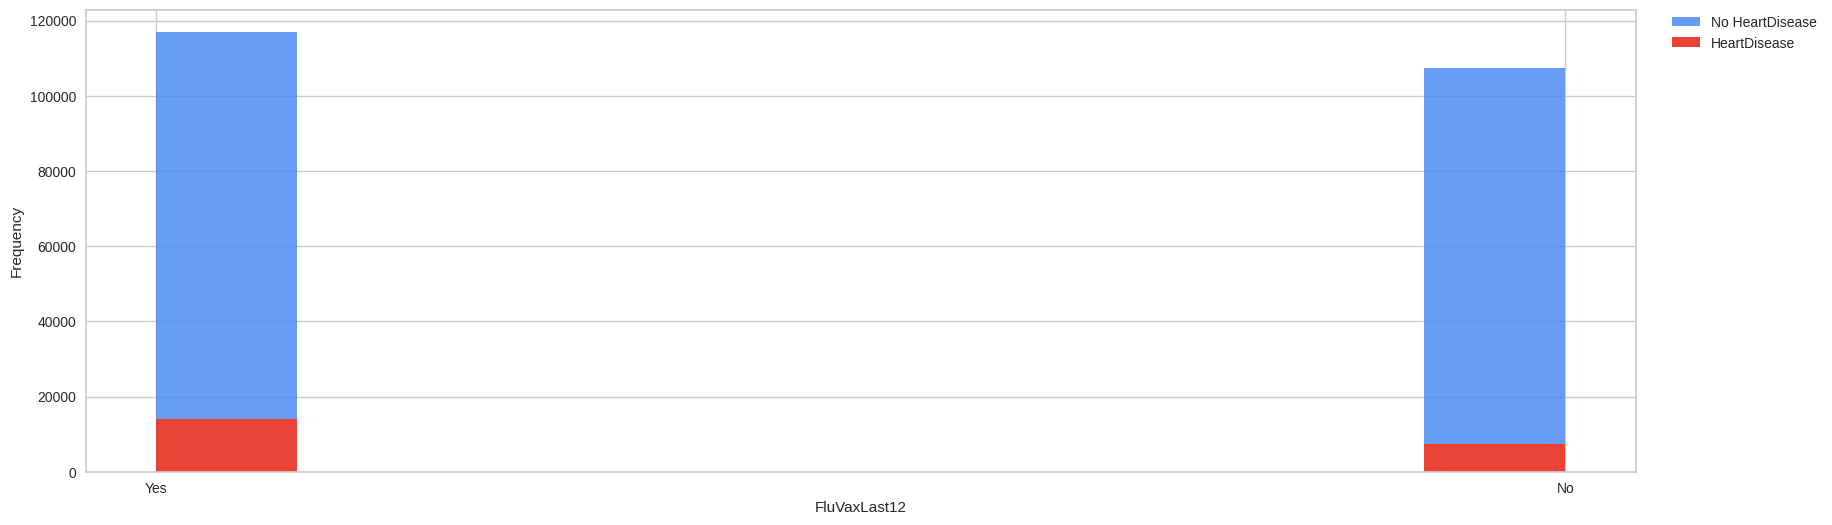

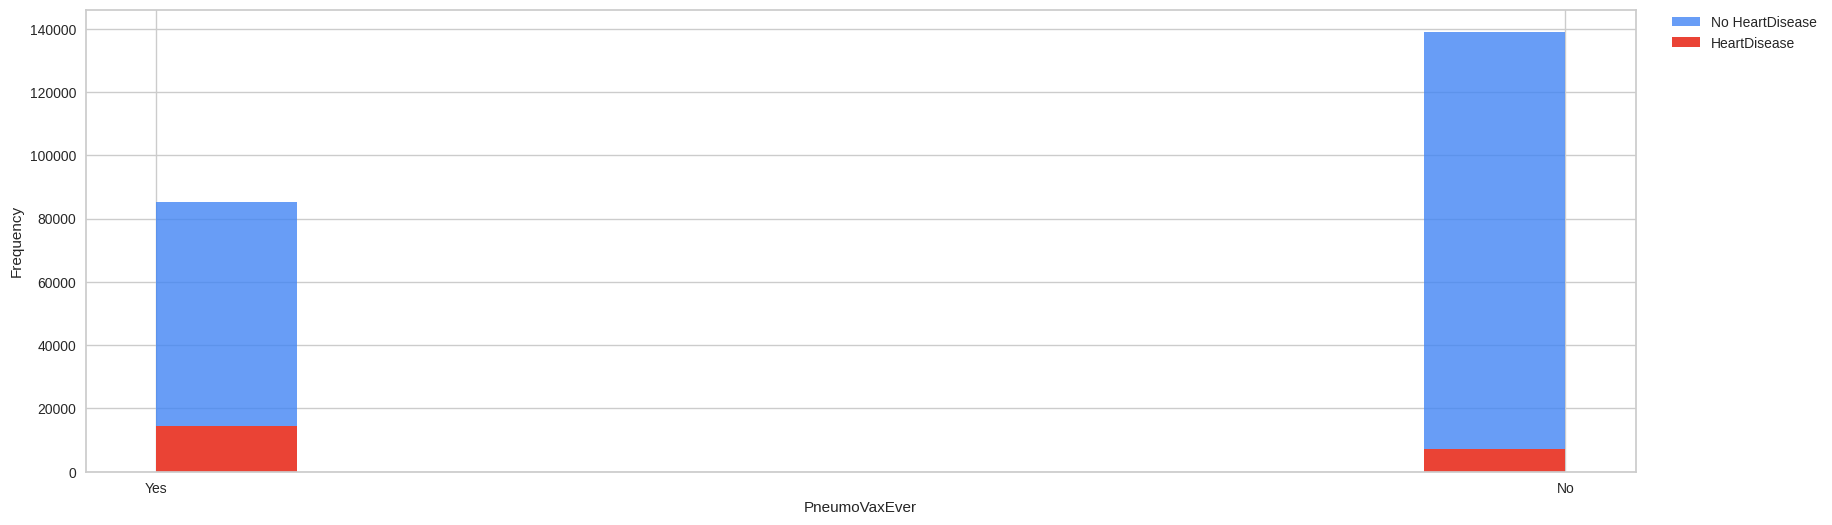

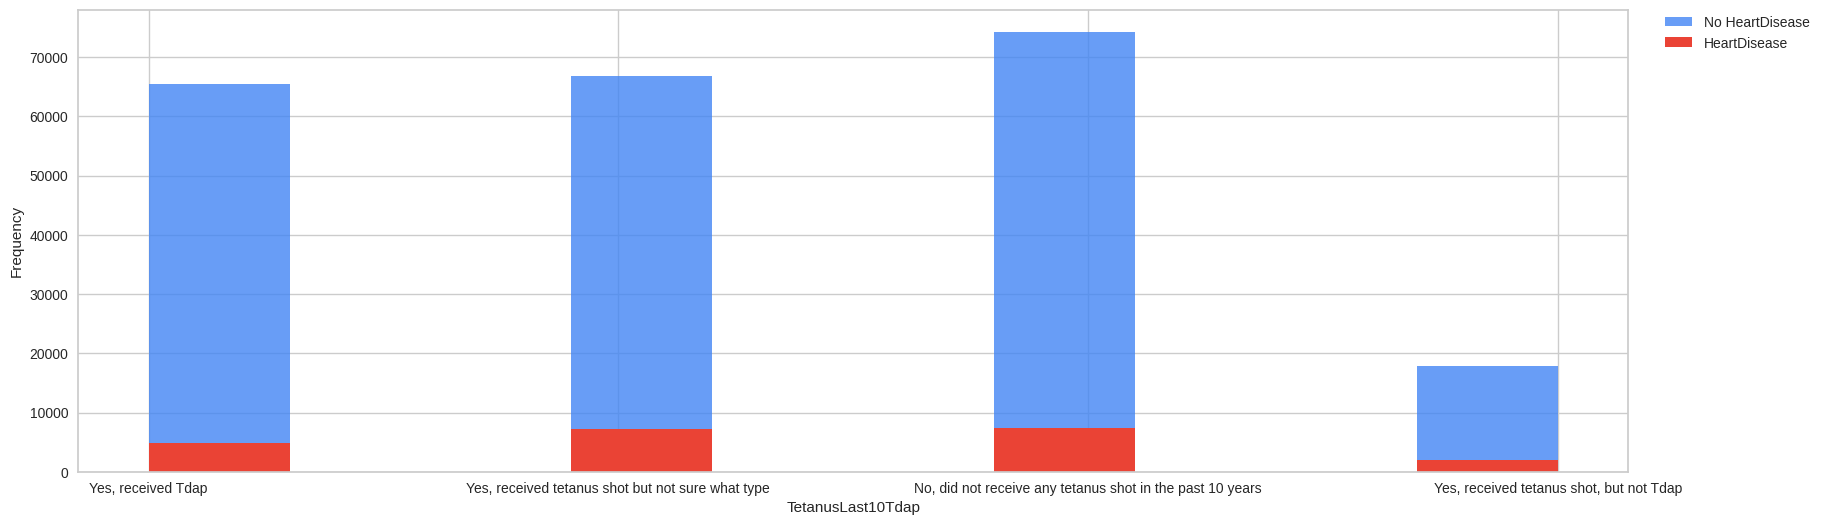

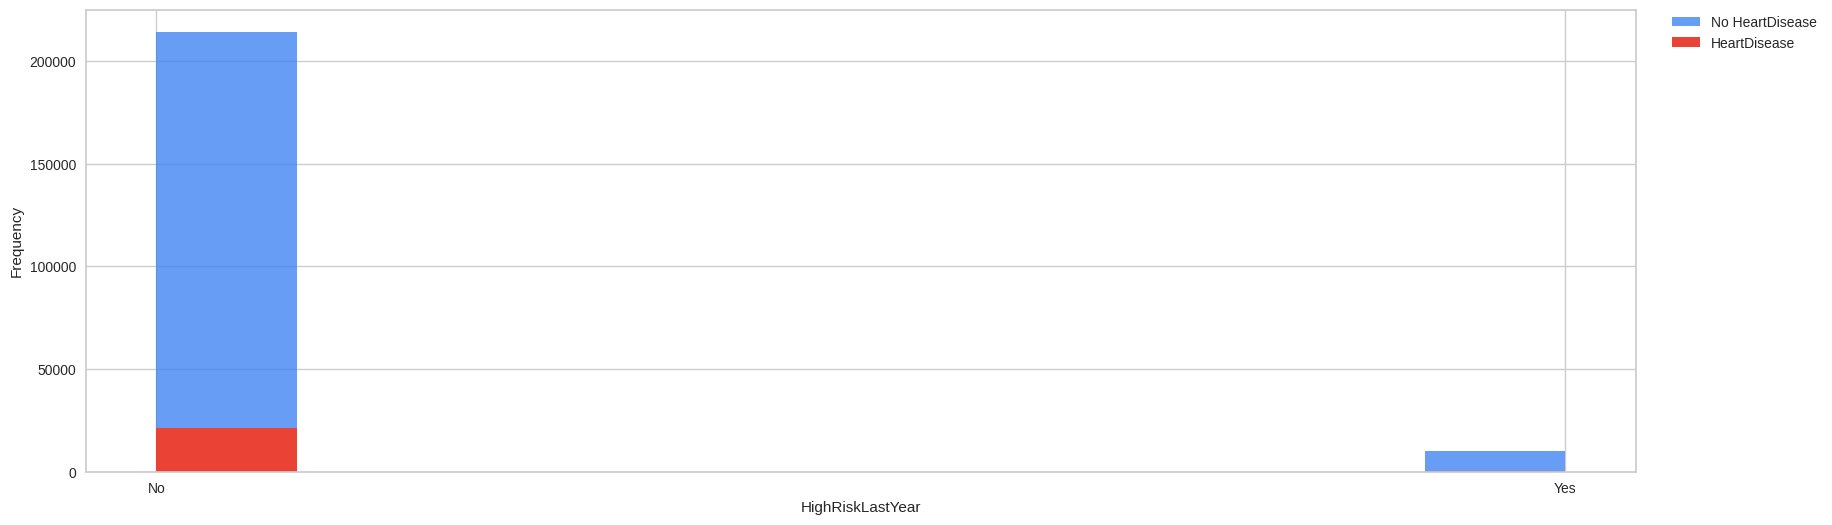

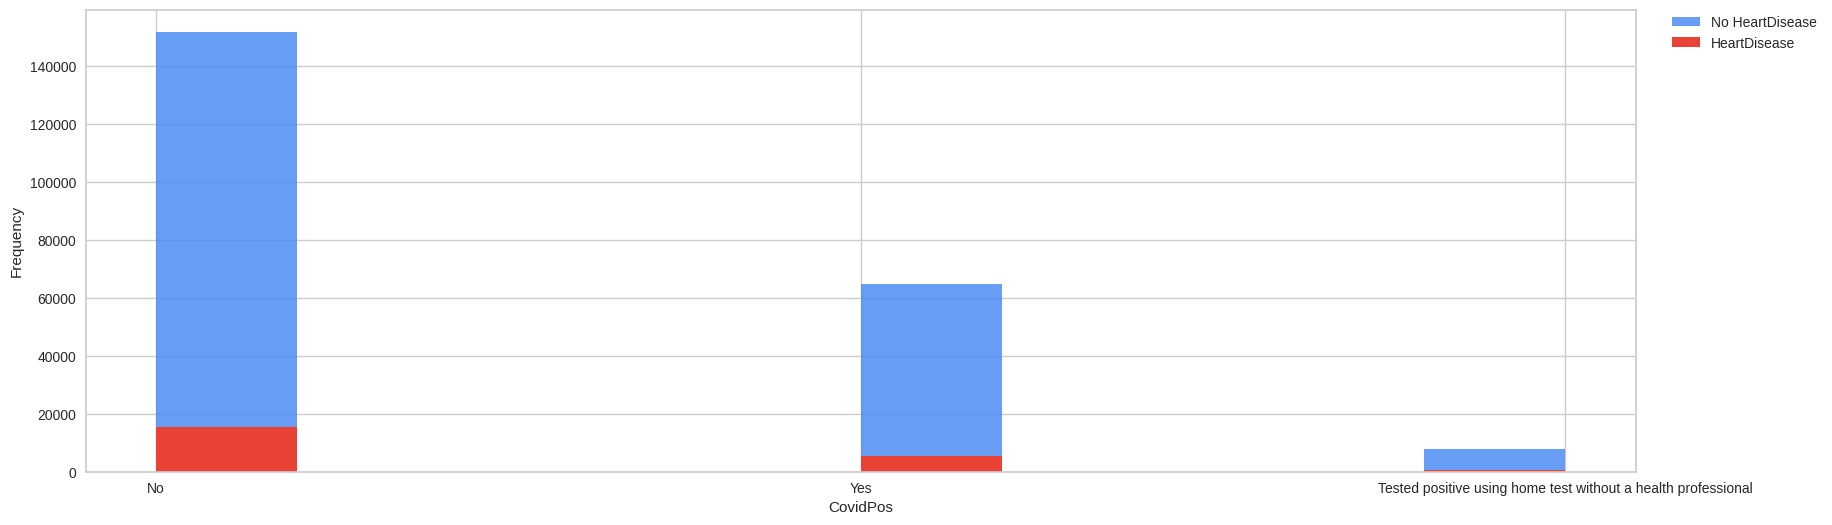

In [122]:
for col in category_cols[1:]:
    fig, ax = plt.subplots(figsize = (20,6))

    ax.hist(df[df["HeartDisease"]==0][col],  alpha=0.8, color="#4285f4", label="No HeartDisease")
    ax.hist(df[df["HeartDisease"]==1][col],  alpha=1, color="#ea4335", label="HeartDisease")

    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

    ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if len(df[col].unique())<=2:
        df[col]=le.fit_transform(df[col])
    else:
        df=pd.get_dummies(df,columns=[col])

In [35]:
df.head()

,Sex,PhysicalActivities,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,DeafOrHardOfHearing,...,BMI_96.2,BMI_97.43,BMI_97.65,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
342,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
343,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
345,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
346,0,1,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
347,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
